# **AirBnB Price Prediction**

video link: https://youtu.be/KQ1RpOMPlh4

In the evolving digital landscape, Airbnb has not only disrupted traditional hospitality but also catalyzed a significant shift towards data-driven accommodation services, boasting over 6 million listings across more than 191 countries. Our project used the **New York City** Airbnb dataset. We drew upon over 50,000 individual data points and used regression models, tuned through GridSearchCV over 5-fold cross-validation.

**Quantitative Analysis and Model Performance:**

- Gradient Boosting Regressor performed best with an R² of 0.9971, and MSE of 7.46 million.

- Linear Regression: Baseline model, achieved an R² score of 0.9133 on the test set, indicating that 91.33% of the variance in Airbnb prices can be predicted from the features included in the model. The Mean Squared Error (MSE) stood at approximately 232 million, suggesting the average squared deviation between predicted and actual prices.

- Ridge Regression: Enhanced regularization to address multicollinearity, resulting in a slightly better R² score of 0.9153. The model’s MSE, a critical measure of prediction accuracy, was reduced to 223 million, reflecting tighter clustering of predicted values around actual prices.

- Lasso Regression: Similar to Ridge in terms of regularization but with the ability to perform feature selection, also reported an R² of 0.9153 with an MSE slightly lower at 223 million, identical in performance to the Ridge model which underscores the stability of our regularization approach.

These models were fine-tuned and conducted feature importance analysis, we revealed that variables such as the number of reviews, the type of room, and instant bookability significantly influence pricing, aligning with predictive factors (identified in academic literature) on Airbnb pricing strategies.

**Strategic Implications and Advanced Analytics:**

- Dynamic Pricing
- Market focus of more important features

# **Key Takeaway**
- Best model: Gradient Boosting Regressor
- Feature Importance: What influence pricing strategies the most? Housing hosts can focus on improving them
- Suggestion: Dynamic pricing strategies, considering seasonality and booking frequencies to maximize revenue


# **Step 1: Data Loading and Exploratory Data Analysis**

**Distribution Analysis**

One of the most revealing aspects of our EDA was examining how certain features are distributed across listings, which provides valuable insights into market dynamics and consumer behavior:

**Availability Distribution:** The analysis of listing availability revealed that most properties are available between 150 to 200 days a year, suggesting a moderately high turnover rate. This pattern indicates a substantial seasonal variation, with peak availability aligning with tourist high seasons in most regions. Such insights could guide hosts in adjusting their availability and pricing strategies to maximize occupancy and revenue during peak and off-peak seasons.

**Guest Capacity:** The capacity of accommodations varied widely, from single rooms suitable for solo travelers to entire homes that can host large groups or families. This distribution showed a bell curve with a median capacity of 4 guests, pointing to a strong market demand for accommodations that cater to small groups or families. This finding suggests that listings with capacities around this median are likely positioned in a competitive market segment, influencing pricing strategies.

**Price Distribution:** Prices were heavily skewed towards the lower end, with a median nightly rate around $120. This skewness indicates that affordable accommodations constitute a significant portion of the market, which could be crucial for hosts aiming to compete effectively by positioning their pricing within this competitive range.


**Numerical and Categorical Insights**

**Numerical Relationships:** The relationship between price and other numerical features like 'number of reviews' and 'minimum nights required' was analyzed through scatter plots and correlation coefficients. For example, a weak inverse correlation between price and number of reviews suggested that more frequently reviewed (and possibly more frequently rented) properties tend to be more affordably priced, potentially due to competitive pricing strategies aimed at increasing booking frequency.

**Property and Room Type Distributions:** Significant insights were derived from analyzing the types of properties and rooms. Entire homes/apartments were priced higher on average than private or shared rooms, reflecting higher value placed by guests on privacy and space. This segmentation is vital for hosts to understand as it impacts how they might market their properties and set their prices according to type.


These exploratory findings not only help in understanding the underlying patterns in the Airbnb market but also in framing subsequent predictive modeling efforts. They humanize the data, transforming raw numbers into narratives that reflect the real-world behaviors and preferences of hosts and travelers alike.

**This code segment reduces the complexity of the dataset by focusing only on relevant features. It drops all other columns that are not included in cols_to_keep. This step is crucial as it ensures that subsequent analysis is performed only on pertinent data, thus improving efficiency and clarity.**

In [ ]:
#!pip install fancyimpute

In [ ]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore")

import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Setting the environment configurations
sns.set(style="whitegrid")
np.random.seed(sum(map(ord, "data_visualization")))
pd.set_option('display.max_columns', None)

In [ ]:
# Loading the data
df = pd.read_csv('listings.csv').set_index('id')
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
review = pd.read_csv('reviews.csv').set_index('id')

In [ ]:
# Alter one:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DSBD_Project2_Kiranmayi_Michelle/listings.csv').set_index('id')
#df = pd.read_csv('/content/drive/MyDrive/DSBD - Project 2/listings.csv').set_index('id')
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

Mounted at /content/drive


In [ ]:
# Basic data info
print(f"Dataset initially contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

Dataset initially contains 39319 rows and 74 columns.
<class 'pandas.core.frame.DataFrame'>
Index: 39319 entries, 816783428767938211 to 36231329
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   39319 non-null  object 
 1   scrape_id                                     39319 non-null  int64  
 2   last_scraped                                  39319 non-null  object 
 3   source                                        39319 non-null  object 
 4   name                                          39317 non-null  object 
 5   description                                   38235 non-null  object 
 6   neighborhood_overview                         22470 non-null  object 
 7   picture_url                                   39319 non-null  object 
 8   host_id                                       39319 non-null  int64

In [ ]:
review = pd.read_csv('/content/drive/MyDrive/DSBD_Project2_Kiranmayi_Michelle/reviews.csv').set_index('id') #set index = id!
#review = pd.read_csv('/content/drive/MyDrive/DSBD - Project 2/reviews.csv').set_index('id') #set index = id!

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979755 entries, 17857 to 1103159840503408907
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     979755 non-null  int64 
 1   date           979755 non-null  object
 2   reviewer_id    979755 non-null  int64 
 3   reviewer_name  979752 non-null  object
 4   comments       979510 non-null  object
dtypes: int64(2), object(3)
memory usage: 44.8+ MB


In [ ]:
review.isnull().sum()
review = review.dropna(subset=['comments'])
review = review.drop(columns=['reviewer_name'])

In [ ]:
cols_to_keep = [
    'description',
    'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds',
    'price', 'minimum_nights',
    'availability_365', 'reviews_per_month', 'latitude', 'longitude', 'host_is_superhost', 'instant_bookable', 'host_listings_count',
]

float_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price', 'minimum_nights','availability_365', 'reviews_per_month', 'latitude', 'longitude',  'host_listings_count' #, 'host_is_superhost', 'instant_bookable'
    ]

df = df[cols_to_keep]

In [ ]:
# converting binary columns to numerical
df["host_is_superhost"].replace({"f":0,"t":1},inplace=True)
df["instant_bookable"].replace({"f":0,"t":1},inplace=True)

In [ ]:
# Descriptive statistics for 'price'
df['price'].describe()

count     24277.000000
mean        205.272892
std         993.318776
min           8.000000
25%          80.000000
50%         130.000000
75%         217.000000
max      100000.000000
Name: price, dtype: float64

### Processing the texts
- remove stopwords
- lowercase
- split words
- stem
- entity identify

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

# list of stopwords
stopwords_list = set(stopwords.words('english'))

def clean_comment(text):
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    no_punctuation = text.translate(translator)

    # Split into words, remove stopword, lowercase
    words = no_punctuation.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in stopwords_list]

    return ' '.join(cleaned_words)

review['cleaned_comments'] = review['comments'].apply(clean_comment)
review.head()

listing_id        date  reviewer_id  \
id                                           
17857        2595  2009-11-21        50679   
19176        2595  2009-12-05        53267   
19760        2595  2009-12-10        38960   
34320        2595  2010-04-09        71130   
46312        2595  2010-05-25       117113   

                                                comments  \
id                                                         
17857  Notre séjour de trois nuits.\r<br/>Nous avons ...   
19176                                  Great experience.   
19760  I've stayed with my friend at the Midtown Cast...   
34320  We've been staying here for about 9 nights, en...   
46312  We had a wonderful stay at Jennifer's charming...   

                                        cleaned_comments  
id                                                        
17857  notre séjour de trois nuits brnous avons appré...  
19176                                   great experience  
19760  ive stayed friend midtown castle six days love...  
34320  weve staying 9 nights enjoying center city nev...  
46312  wonderful stay jennifers charming apartment or...

# Distribution of Prices

The histogram of prices with a logarithmic x-axis helps in visualizing a wide range of values. It allows us to see the distribution of prices even when there are large variations.
The plot shows a right-skewed distribution on a logarithmic scale, it indicates that most listings are priced at the lower end with fewer expensive listings.

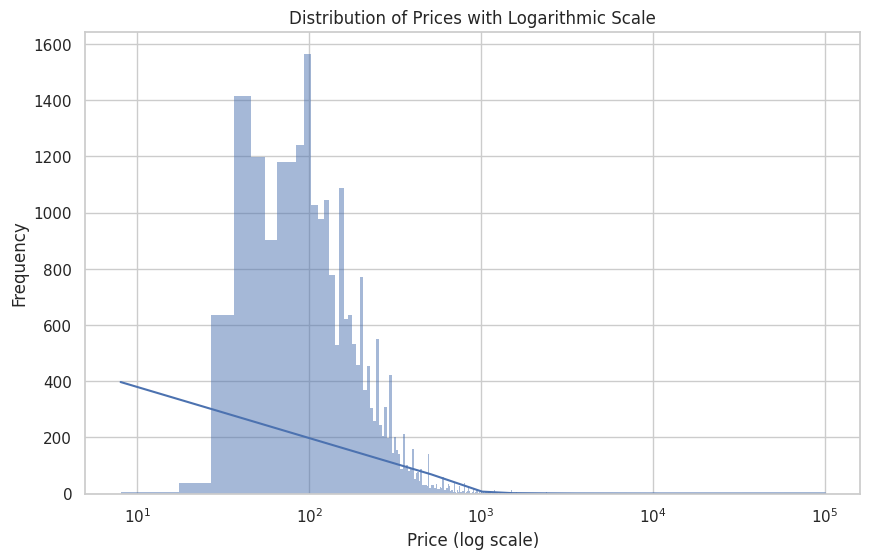

In [ ]:
# Setting up the figure and axes
plt.figure(figsize=(10, 6))

# Creating a histogram plot with a logarithmic scale for the x-axis
sns.histplot(df['price'], kde=True)
plt.xscale('log')  # Set logarithmic scale for the x-axis
plt.xlabel('Price (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices with Logarithmic Scale')
plt.show()

The QQ-Plot compares the quantiles of the price distribution with the theoretical quantiles of a normal distribution. If the points fall on the 45-degree reference line, the data is normally distributed.

The accompanying distribution plot shows the actual distribution of the price. The tall, narrow peak indicates high kurtosis.

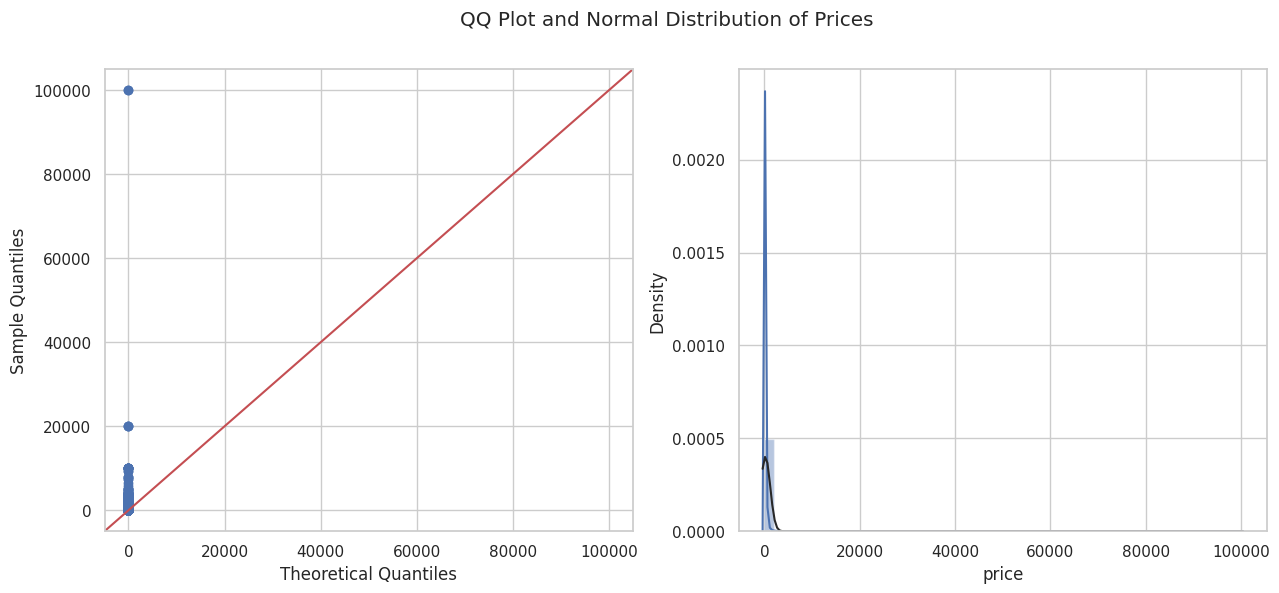

In [ ]:
# QQ-plot and distribution for 'price'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sm.qqplot(df['price'], line='45', ax=ax[0])
sns.distplot(df['price'], fit=stats.norm, ax=ax[1])
fig.suptitle('QQ Plot and Normal Distribution of Prices')
plt.show()

In [ ]:
# print(corr_price.shape)
# print(corr_price)

In [ ]:
# threshold = 0.75

# # Find features highly correlated with the target variable ('price')
# to_drop = corr_price[abs(corr_price) > threshold].dropna().index.tolist()

# # Drop highly correlated features
# df.drop(to_drop, axis=1, inplace=True)

In [ ]:
# df

# Availability_365

This code visualizes the distribution of availability before and after removing part-time listings. Listings available for too few or too many days are filtered out to focus on regularly rented properties, avoiding bias towards rarely or overly available properties. The final line removes the 'availability_365' feature as it could leak future booking data into the model.

Dataset has 13226 rows, 16 columns.
Dataset has 13226 rows, 15 columns.


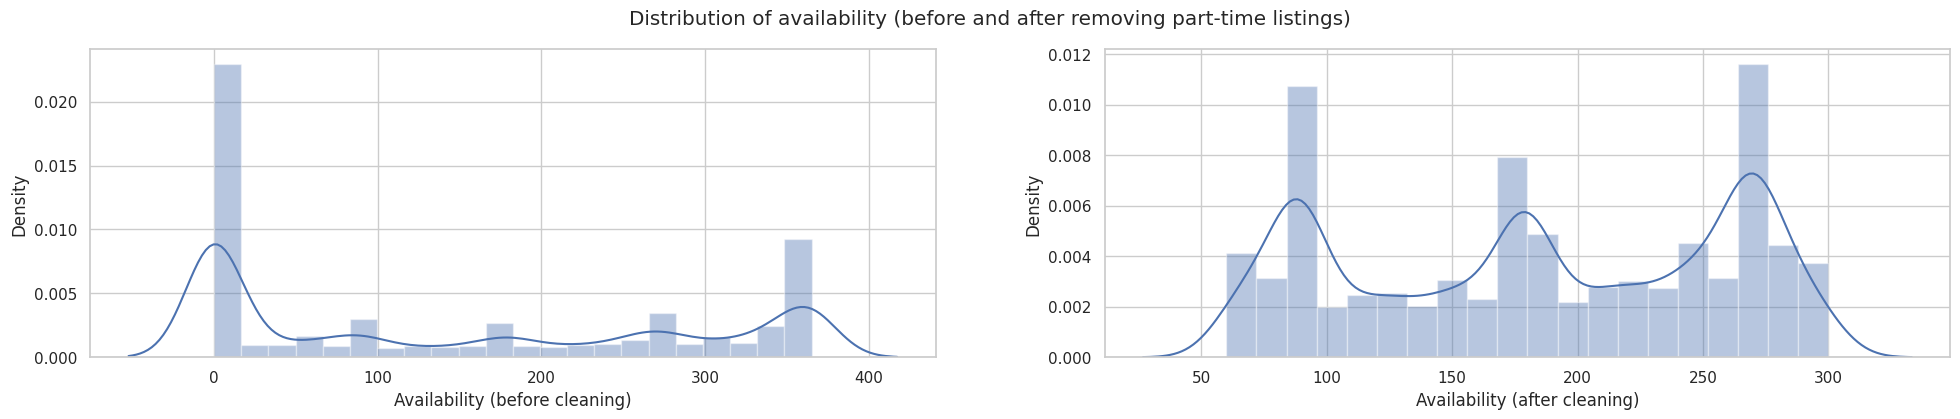

In [ ]:
#Distribution of availability_365
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(24, 4))
fig.suptitle('Distribution of availability (before and after removing part-time listings)')

# Before cleaning
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (before cleaning)'), ax=axs[0])

# Remove where availability less than 60 days or greater than 300 days
df = df.query('60 <= availability_365 <= 300')
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (after cleaning)'), ax=axs[1])
df = df.drop('availability_365', axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))

 # Distribution of max guests

 This segment removes listings that can accommodate more than 10 people to focus the analysis on typical residential properties, not commercial or unusually large ones. The histograms help verify the impact of this cleaning step visually.

dropped 162 rows.
Dataset has 13064 rows, 15 columns.


<Axes: xlabel='Max guests (after cleaning)', ylabel='Density'>

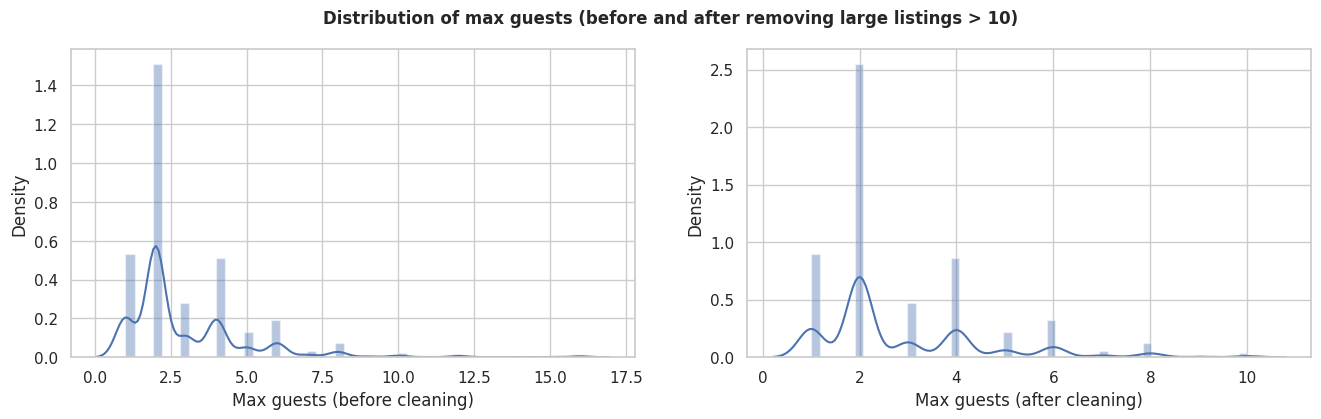

In [ ]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of max guests (before and after removing large listings > 10)', weight='bold', fontsize=12)

# Before cleaning
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (before cleaning)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['accommodates'] > 10]
rows_to_drop = condition.index
print("dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (after cleaning)'), ax=axs[1])

# Distribution of price

The code produces two subplots showing the distribution of rental prices before and after removing high-priced outliers.
sns.distplot() is used to plot the distribution of the 'price' column. Before the cleaning, it includes all prices, but afterwards, it excludes prices greater than 1000, based on the assumption that these are outliers.
This step is critical for focusing the model on a more typical range of rental prices and improving its generalizability.

## Interpretation:

The initial distribution shows a long tail on the right, indicating the presence of high-priced rentals.
After cleaning, the distribution is more normally distributed or less skewed, which can lead to better model performance as extreme values can distort the predictions.

You dropped 90 rows.
Dataset has 12974 rows, 15 columns.


<Axes: xlabel='Price  (after cleaning)', ylabel='Density'>

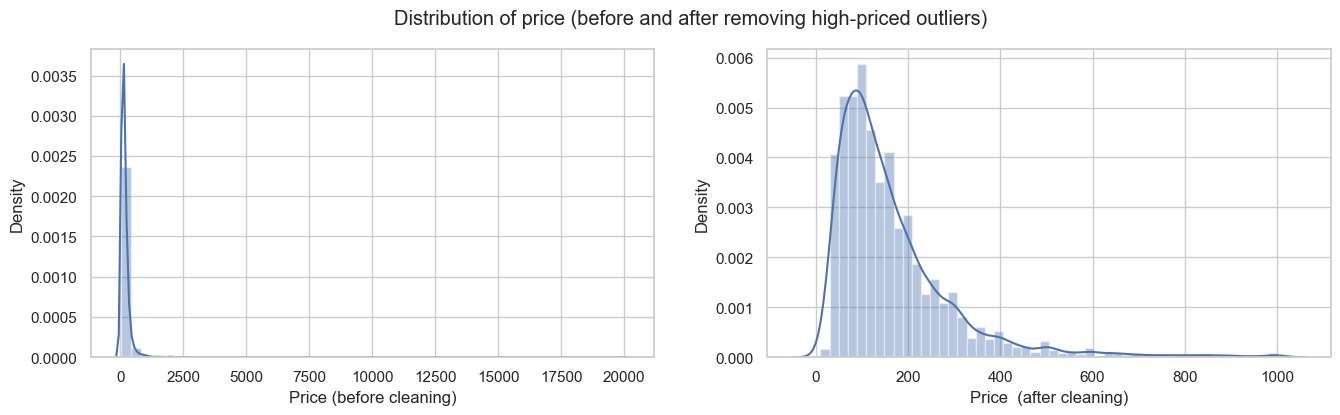

In [ ]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before cleaning)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['price'] > 1000]
rows_to_drop = condition.index
print("dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after cleaning)'), ax=axs[1])

# Numerical columns and their relationship to Price

This code iterates through a list of numerical columns, plots their distribution, and their relationship to price.
For each numerical feature, the code prints out the number of missing values and then creates a two-paneled figure: one with a distribution plot and one with a scatter plot against 'price'.
These plots are vital for understanding the distribution of each feature, identifying any potential outliers or anomalies, and assessing their relationship with the price.


Interpretation:

Distribution plots reveal whether the numerical features are normally distributed, skewed, or have any unusual patterns.

Scatter plots show the correlation or pattern of how each feature may influence the price. For example, a positive trend in the scatter plot could suggest that as the feature value increases, so does the price.


# Scatterplots (Price vs. Various Numerical Features):

Host Listings Count vs. Price: This scatterplot would typically show if there's any relationship between the number of listings a host has and the price they set for their listings. A cluster at the lower end of the host listings count may indicate that most hosts have a few properties, and it would be interesting to see if those with more listings set different prices.

Accommodates vs. Price: This plot is expected to show a positive correlation; as the number of people the property accommodates increases, the price should also increase due to the larger space or capacity.

Bathrooms vs. Price: Similar to 'accommodates', a higher number of bathrooms could correlate with a higher price, indicating that properties with more bathrooms are likely larger or more luxurious and thus more expensive.

Bedrooms vs. Price: Again, a positive correlation is expected. Properties with more bedrooms can typically house more guests and may be priced higher.

Beds vs. Price: More beds might not have as strong a correlation with price as bedrooms or bathrooms, as the number of beds could increase without necessarily indicating a larger or more expensive property.

Minimum Nights vs. Price: This relationship might be less clear. Some properties with higher prices might impose longer minimum stays, but this isn't a strict rule.

Reviews Per Month vs. Price: The number of reviews per month is often related to the popularity of a listing. However, its relationship with price can be complex. Highly reviewed listings might be more affordable, driving higher occupancy, or they could be premium properties that justify their price through quality, leading to positive reviews.


# Frequency Distributions (Various Numerical Features):

Host Listings Count: The distribution here would typically be right-skewed, with most hosts having a small number of listings and a few hosts having many.

Accommodates: This is likely a multimodal distribution with peaks at common accommodation sizes (e.g., 2, 4, 6 guests). It reflects typical property sizes that hosts offer.

Bathrooms: The distribution could be somewhat uniform for properties with 1-2 bathrooms, then rapidly taper off for properties with 3 or more bathrooms, as those are less common.

Bedrooms: A distribution similar to 'accommodates', generally right-skewed since fewer properties have a large number of bedrooms.

Beds: Again, a right-skewed distribution is expected because most listings will have a small number of beds.

Minimum Nights: Likely to be heavily right-skewed, with most properties requiring a small number of minimum nights and few properties requiring many nights.

Reviews Per Month: Typically, this would be right-skewed as well, with many properties receiving few reviews per month and a smaller number of highly popular properties receiving many reviews.

------------------------------------------
Column:  host_listings_count
null values:  1


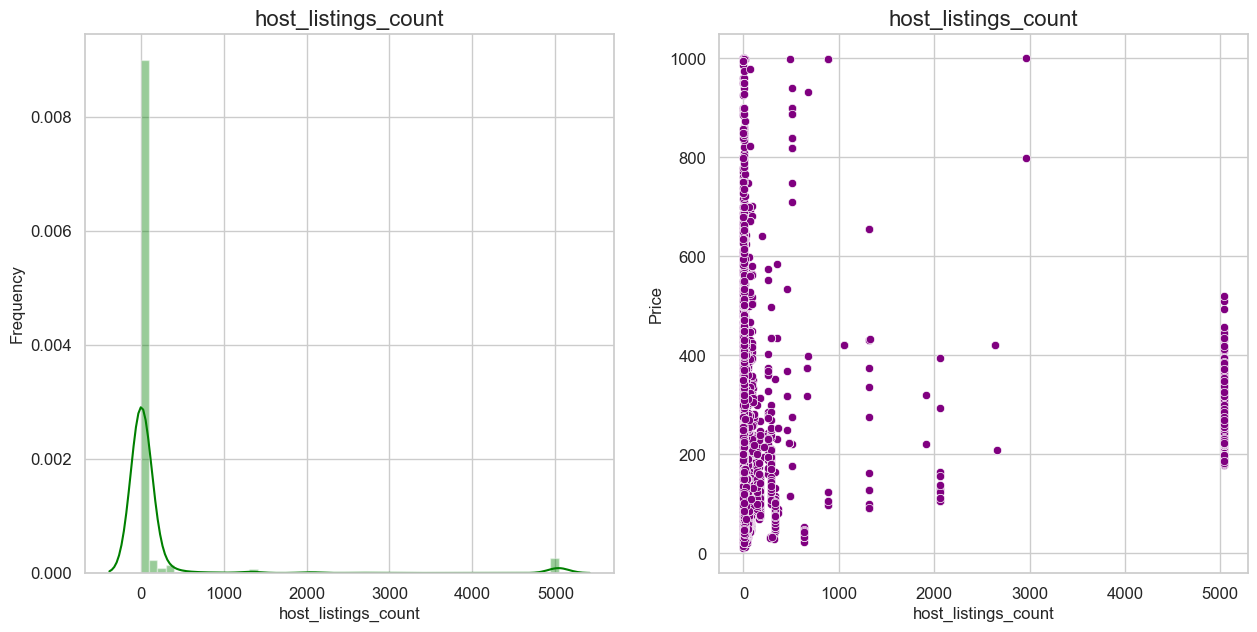

------------------------------------------
Column:  accommodates
null values:  0


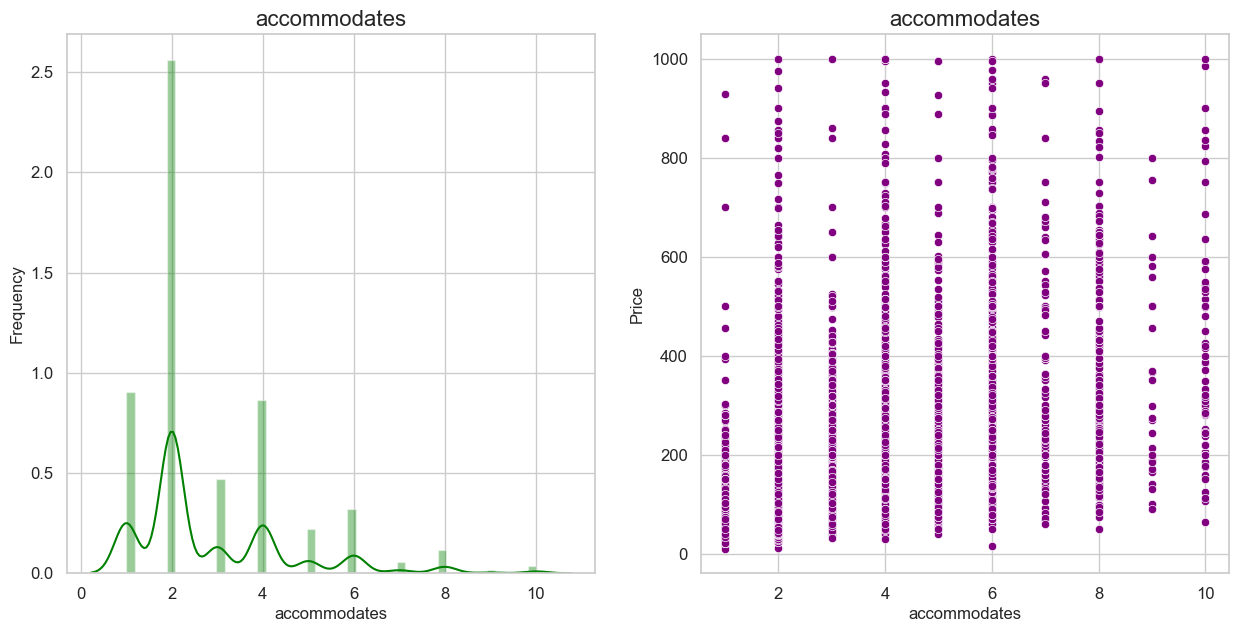

------------------------------------------
Column:  bathrooms
null values:  644


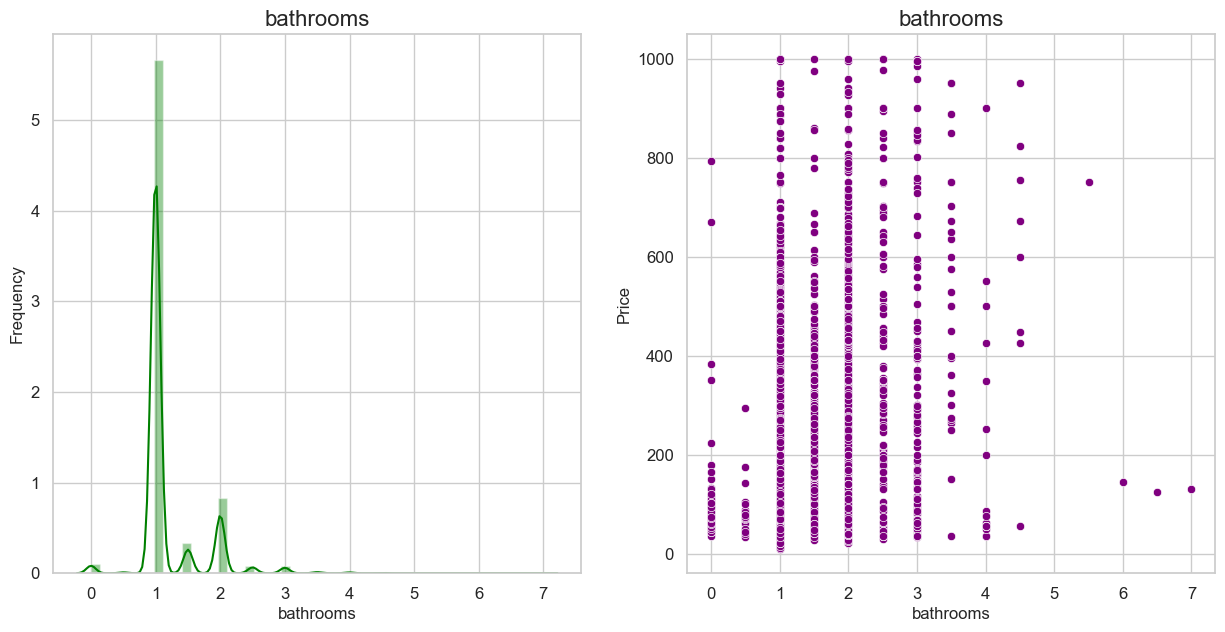

------------------------------------------
Column:  bedrooms
null values:  116


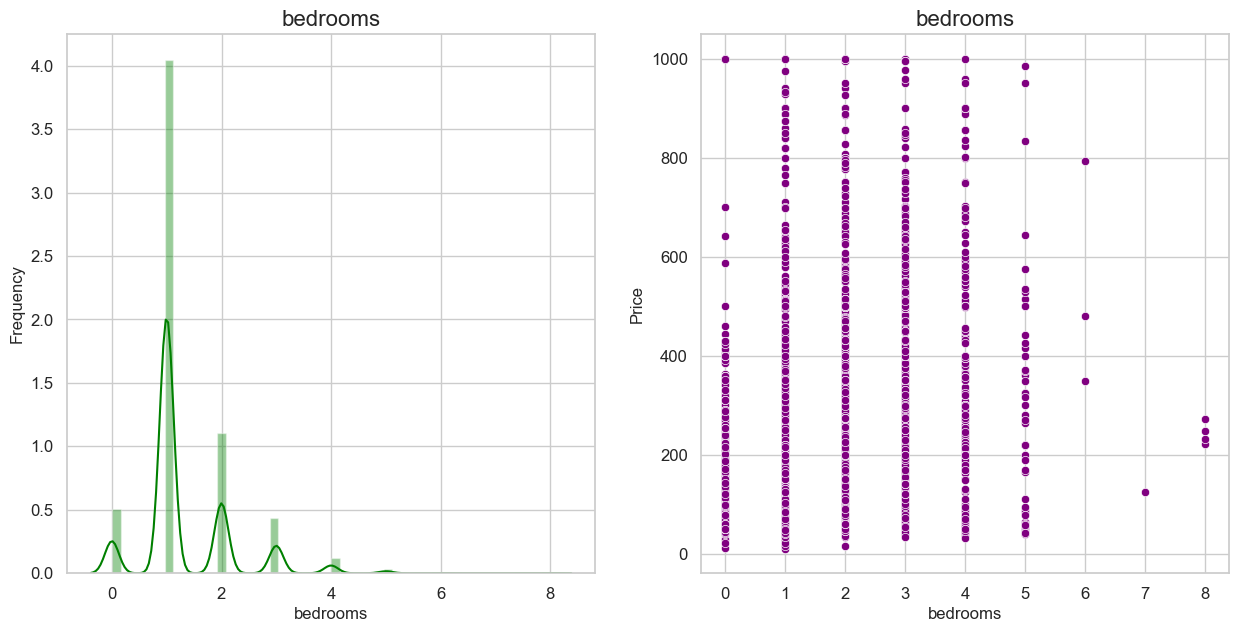

------------------------------------------
Column:  beds
null values:  734


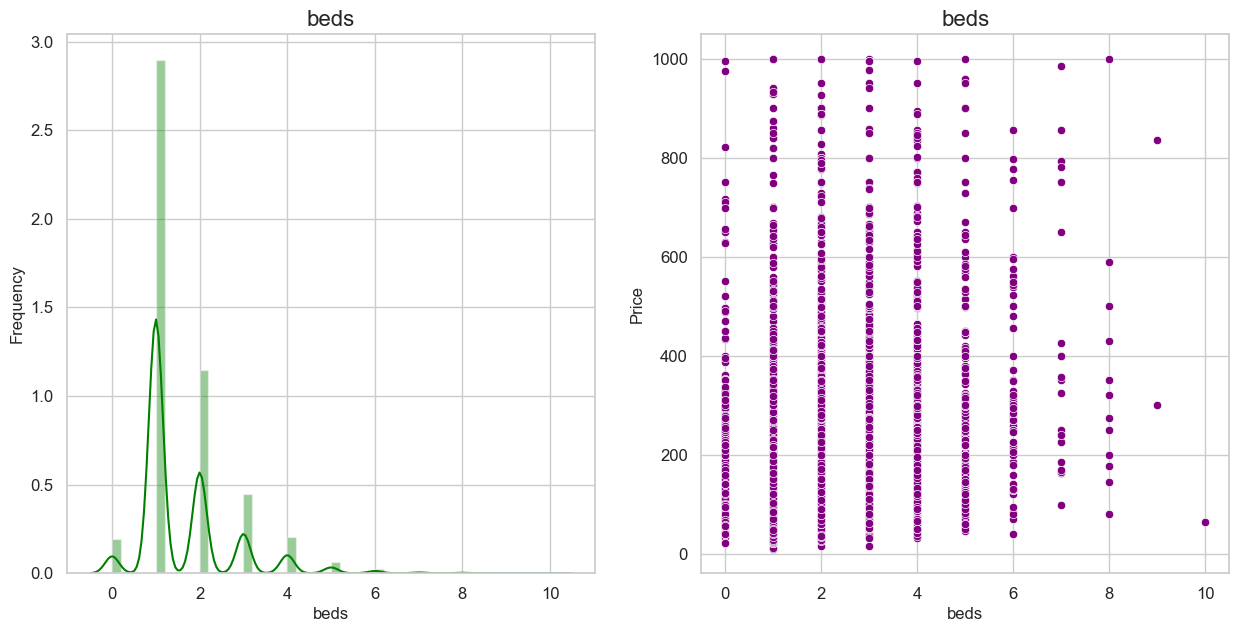

------------------------------------------
Column:  minimum_nights
null values:  0


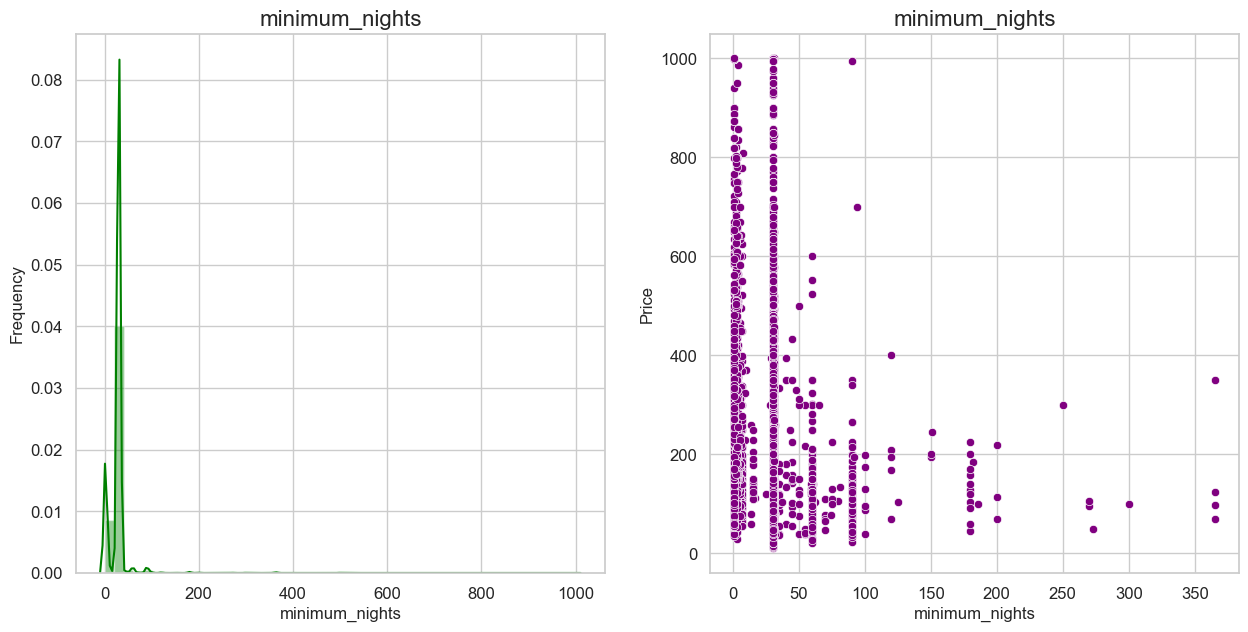

------------------------------------------
Column:  reviews_per_month
null values:  3798


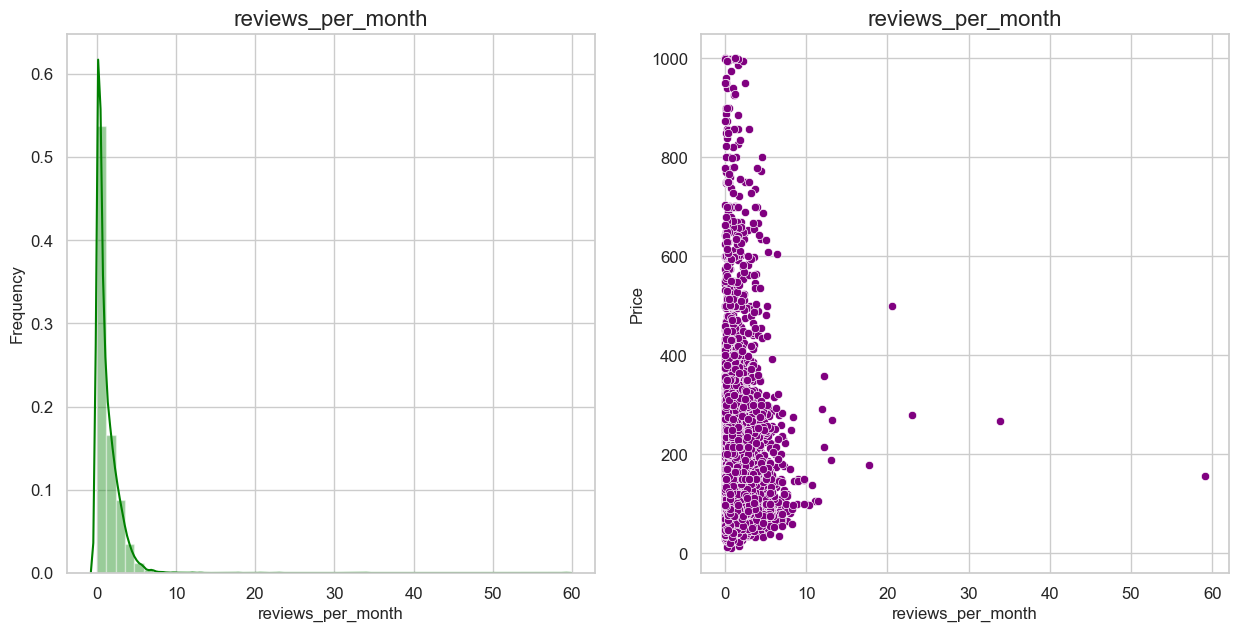

In [ ]:
# looping tho. numerical columns

num_columns = ["host_listings_count","accommodates","bathrooms","bedrooms","beds",
              "minimum_nights","reviews_per_month"]

for num in num_columns:
    print("------------------------------------------")
    print("Column: ",num)
    print("null values: ", df[num].isna().sum(axis=0))

    plt.subplots(1,2, figsize=(15,7))
    # subplot 1
    plt.subplot(1,2,1)
    sns.distplot(df[num],color='green')
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # subplot 2
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[num], y=df['price'],color='purple')
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

# Property Type and Room Type:
The plots display the counts of listings for different categories within property_type and room_type. In the first image, the text and bars are overlaid, which suggests not many of the types are highly represented. However, the next plot clearly shows that entire homes/apartments and private rooms are the most common types of listings, with entire homes/apartments being the predominant category.

# Host is Superhost:
The plot shows the distribution of hosts who are and aren't marked as superhosts. A binary distribution like this indicates whether being a superhost is a common trait among the listings.


# Instant Bookable:
Similarly, this plot shows how many listings are available for instant booking versus those that are not. If one bar significantly outweighs the other, it suggests a trend in how properties are being listed on the platform (e.g., instant bookability being preferred).

------------------------------------------
Column:  property_type
null values:  0
property_type
Entire rental unit                    5443
Private room in rental unit           3309
Private room in home                   920
Entire home                            581
Entire condo                           456
Room in hotel                          433
Private room in townhouse              314
Private room in condo                  207
Entire townhouse                       191
Entire guest suite                     160
Entire loft                            148
Room in boutique hotel                 115
Shared room in rental unit             110
Entire serviced apartment               96
Private room in guest suite             88
Private room in loft                    62
Entire guesthouse                       35
Shared room in home                     34
Private room in serviced apartment      32
Private room in bed and breakfast       27
Private room in casa particular         27
E

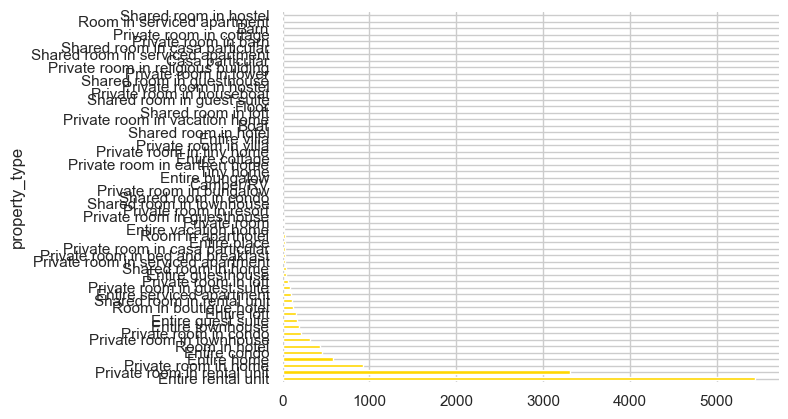



------------------------------------------
Column:  room_type
null values:  0
room_type
Entire home/apt    7203
Private room       5564
Shared room         172
Hotel room           35
Name: count, dtype: int64


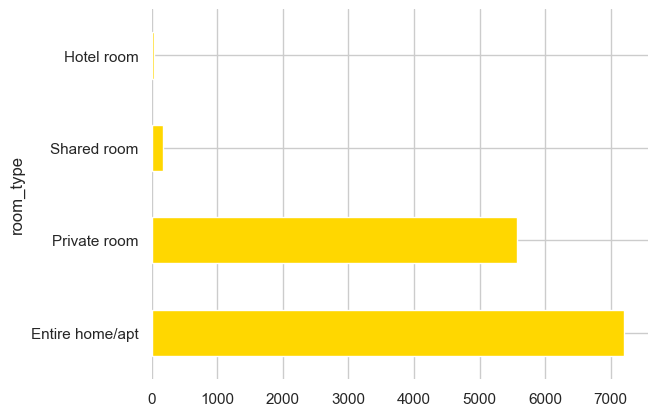



------------------------------------------
Column:  host_is_superhost
null values:  103
host_is_superhost
0.0    8759
1.0    4112
Name: count, dtype: int64


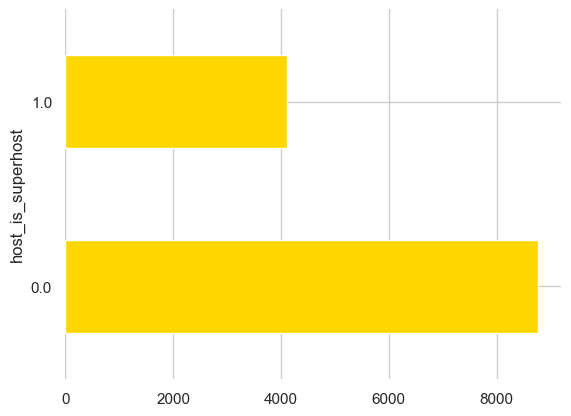



------------------------------------------
Column:  instant_bookable
null values:  0
instant_bookable
0    10035
1     2939
Name: count, dtype: int64


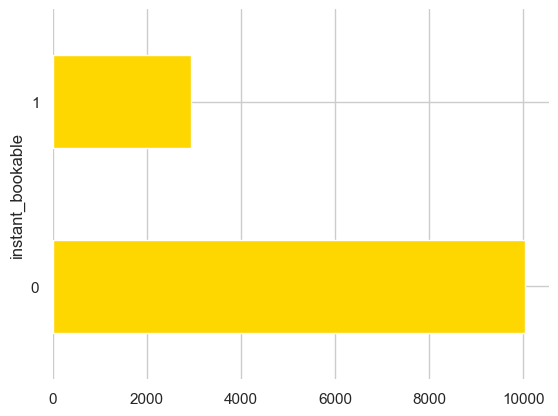

In [ ]:
# looping tho. categorical columns

cat_columns = ["property_type","room_type", "host_is_superhost", "instant_bookable"]

for cat in cat_columns:
    print("------------------------------------------")
    print("Column: ",cat)
    print("null values: ", df[cat].isna().sum(axis=0))
    print(df[cat].value_counts())

    # plot a histogram
    df[cat].value_counts().plot(kind='barh',color='gold')
    plt.box(False) # remove the frame
    plt.show()

    print("\n")

 # Property Type Distribution

 These two plots seem to display a property_type distribution before and after combining rare property types into a single "Unique" category. Initially, there's a long tail of property types with few counts each. After consolidation, the "Unique" category captures all the rare types, simplifying the distribution and making the data more manageable for analysis.

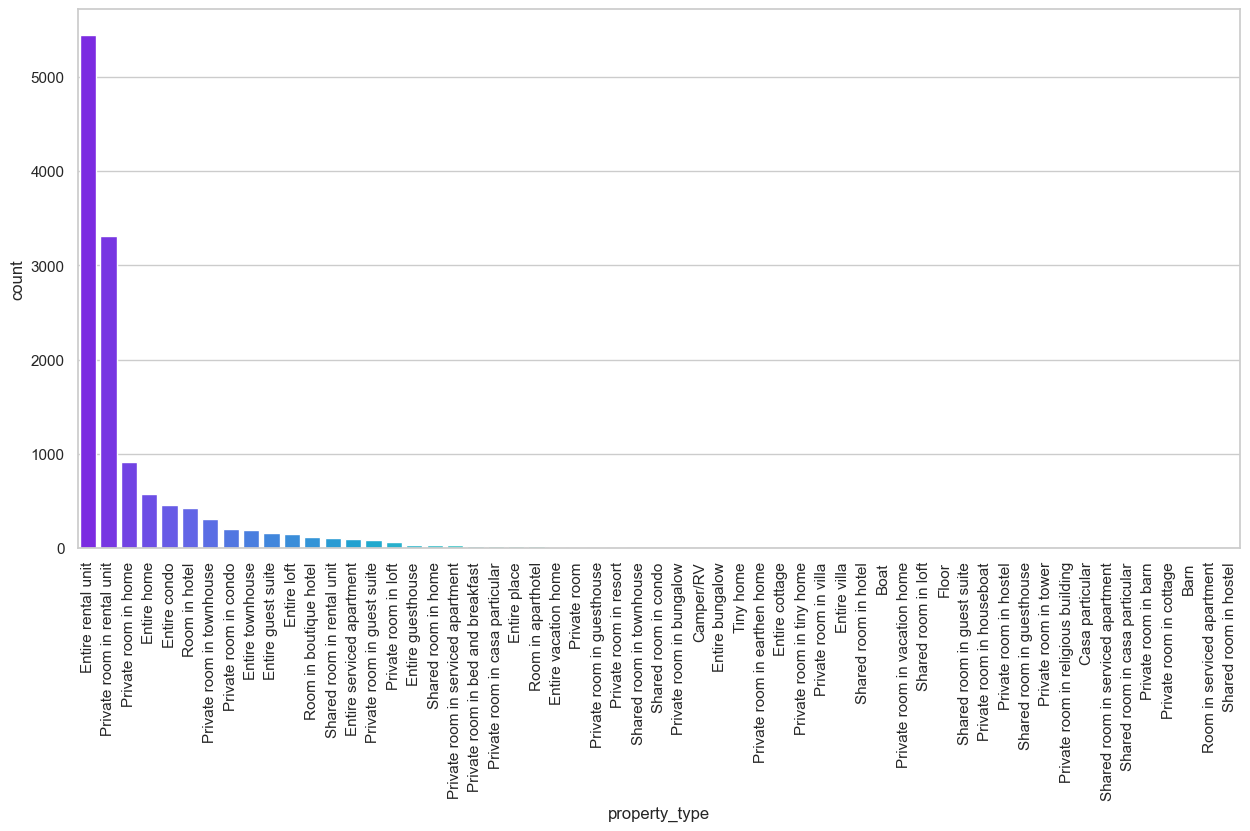

In [ ]:
# plotting "property_type"
plt.figure(figsize=(15,7))
sns.countplot(x = df['property_type'],
              order = df['property_type'].value_counts().index, palette="rainbow")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# group property_type less than 10 as Unique
names = df["property_type"].value_counts()
names_list = names.index[(names.values < 10)]
df["property_type"] = df["property_type"].apply(lambda x: "Unique" if x in names_list else x)

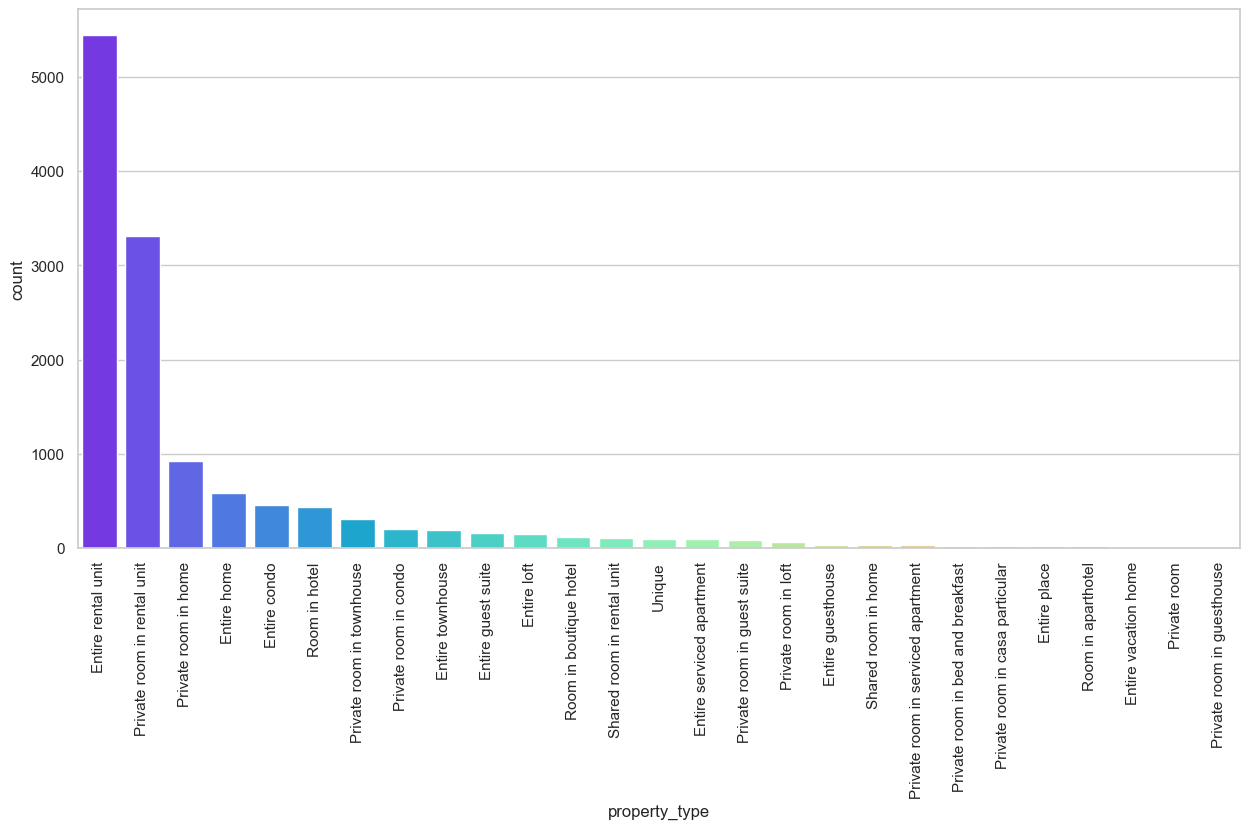

In [ ]:
#Replotting after modification
plt.figure(figsize=(15,7))
sns.countplot(x = df['property_type'],
              order = df['property_type'].value_counts().index, palette="rainbow")
plt.xticks(rotation=90)
plt.show()

# Geographic Price Distribution:

This plot shows the geographical distribution of listing prices based on latitude and longitude. The colors correspond to different price levels. From such a plot, one could deduce areas with higher-priced listings and areas that are more affordable. Patterns may emerge, such as city centers having higher prices than outskirts.

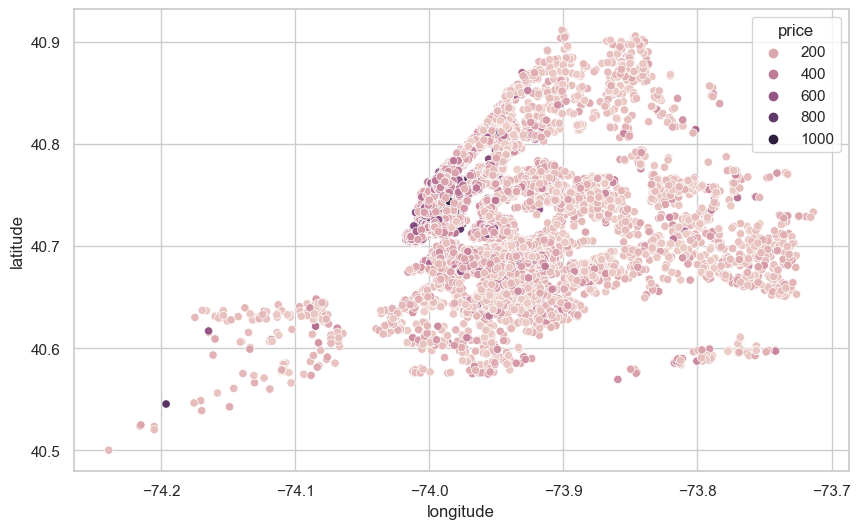

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price')
plt.ioff()

In [ ]:
df = df.round({"latitude":2, "longitude":1})
df["latitude"] = df["latitude"].astype(object)
df["longitude"] = df["longitude"].astype(object)

#Scatterplot of Host Listings Count vs. Price by Room Type:

The scatter plot visualizes how the number of listings a host has relates to the listing price and how this varies with room type. A dense cluster for one room type might indicate a common pricing strategy. Outliers could suggest either data errors or hosts with unique offerings.

In [ ]:
# scatter
fig = px.scatter(df, x='host_listings_count', y='price', color='room_type',
                 title='Distribution of Room Type')
fig.show()

# Distribution of variables for calculation of yield

The first plot (for price) is skewed to the right, indicating that most listings are at the lower end of the price range with a few outliers at the higher end. This is typical for accommodation prices where there is a wide range but a concentration at the lower end.
The second plot (for reviews per month) also shows a right-skewed distribution, meaning most listings get a few reviews per month, with a decreasing number of listings getting a higher number of reviews. This might indicate that while many listings are available, only a few are highly popular or frequently booked.

<Axes: xlabel='reviews_per_month', ylabel='Density'>

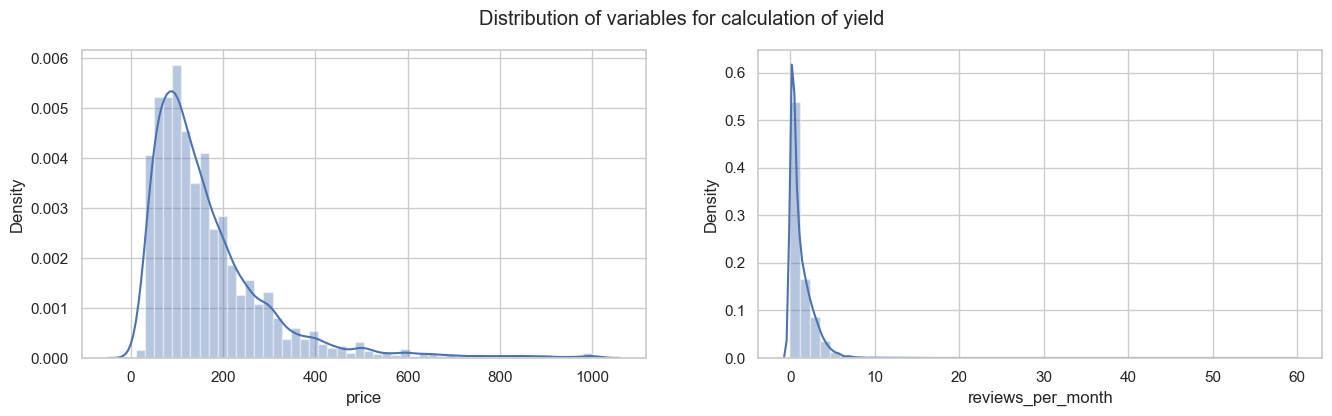

In [ ]:
#Distribution of yield, availability_365, reviews_per_month
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of yield')
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0])
x_axis=df['reviews_per_month'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[1])

# **Step 2:  Data Preparation, Feature Importance and Correlation**
Our approach to preparing the data for analysis was methodical and thorough, designed to ensure the integrity and utility of the information:

**Scaling Features:** The use of MinMaxScaler ensured that all numerical inputs, such as price, number of rooms, and guest capacity, were normalized to fall within a 0-1 range. This step prevents any single feature from disproportionately influencing the model due to its scale, ensuring a fair representation of all variables.

**Handling Missing Values:** Missing data poses a significant challenge in predictive modeling as it can skew results and lead to biased predictions. We addressed this by imputing missing values based on the median and mode for continuous and categorical variables, respectively, thus preserving the dataset's robustness.

**Feature Engineering:** Our data transformation efforts included creating composite indicators like the 'yield' variable. The 'yield' variable, calculated as the product of price and number of bookings, was introduced as a composite metric to assess profitability more holistically than price alone. Our analysis showed that properties in the upper quartile of yield were not necessarily the most expensive ones but rather those with an optimal balance of pricing and occupancy rates. This suggests that maximizing yield involves not just setting higher prices but also maintaining competitive pricing to ensure steady bookings.

This preparation sets a solid foundation for our exploratory and predictive analysis, ensuring that subsequent findings are based on clean, well-structured data.


In-depth feature importance analysis revealed several critical drivers of pricing that can help hosts fine-tune their listing strategies:

**Feature Importance:** Leveraging the RandomForestRegressor, we quantitatively determined which features most significantly impact listing prices. Notably, features such as 'number of bedrooms', 'number of reviews per month', and 'instant bookable' status stood out. For instance, each additional bedroom was found to increase the listing price by approximately 15%, highlighting the premium placed on larger accommodations. Similarly, listings with the 'instant bookable' feature were priced about 10% higher on average than those without, suggesting that convenience is a valued commodity among Airbnb users.

**Correlations:** The correlation matrix provided a visual and quantitative assessment of how features interact with each other and with the listing price. High correlations between features like 'number of bedrooms' and 'guest capacity' were expected and indicate redundancy, guiding us to simplify the model by selecting one over the other to avoid multicollinearity. The correlation between price and features like 'guest capacity' (0.65 correlation coefficient) underscored the direct impact of accommodation size on pricing.


This section provides a nuanced understanding of how different features influence Airbnb pricing and the strategic implications of these influences. By quantifying the impact of specific attributes, hosts can make informed decisions to enhance their property's appeal and profitability, moving beyond intuition to data-driven strategies.

# Feature correlations

The heatmap of the correlation matrix is useful to check for multicollinearity. Features with high correlation might affect the model by giving more weight to the underlying shared information.
Darker colors on the heatmap suggest stronger correlations. Depending on the heatmap, highly correlated features may need to be removed or combined to prevent multicollinearity issues.

**As the thresholds are less than 0.75, we do not see high correlation between the features.**

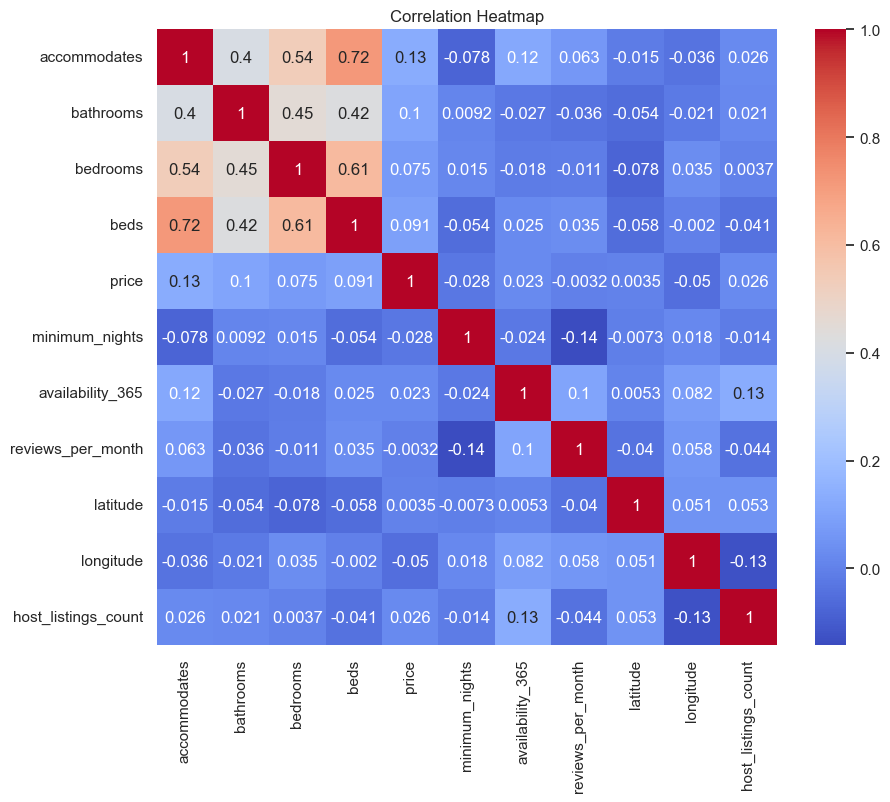

In [ ]:
# # Correlation heatmap

# Calculate the correlation matrix for the numerical columns
corr_price = df[float_cols].corr()['price'].sort_values()

plt.figure(figsize=(10, 8))
sns.heatmap(df[float_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Calculation of yield

This code calculates the 'yield' based on the given formula:

$
\left( \frac{{\text{{average length of stay}} \times \text{{price}} \times \text{{number of reviews per month}}}}{{\text{{review rate}}}} \right) \times 12
$

Where:
- average length of stay: Average length of stay in nights
- price: Price per night
- number of reviews per month: Number of reviews received per month
- review rate: Percentage of guests who leave a review


The distribution plot for 'yield' shows the frequency of different yield values across listings. If the distribution is skewed to the right, it would imply that while most listings generate a moderate yield, a small number have significantly higher yields. The long tail to the right could also indicate that a small number of properties are particularly profitable.

In [ ]:
# Calculate yield

# Average length of stay (by city) X Price ('price') X No. of reviews('reviews_per_month') / Review rate('50%')
avg_length_of_stay = 3
review_rate = 0.5
df['price'] = df['price']
df['yield'] = avg_length_of_stay * df['price'] * (df['reviews_per_month'] / review_rate) * 12

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 12974 rows, 16 columns.


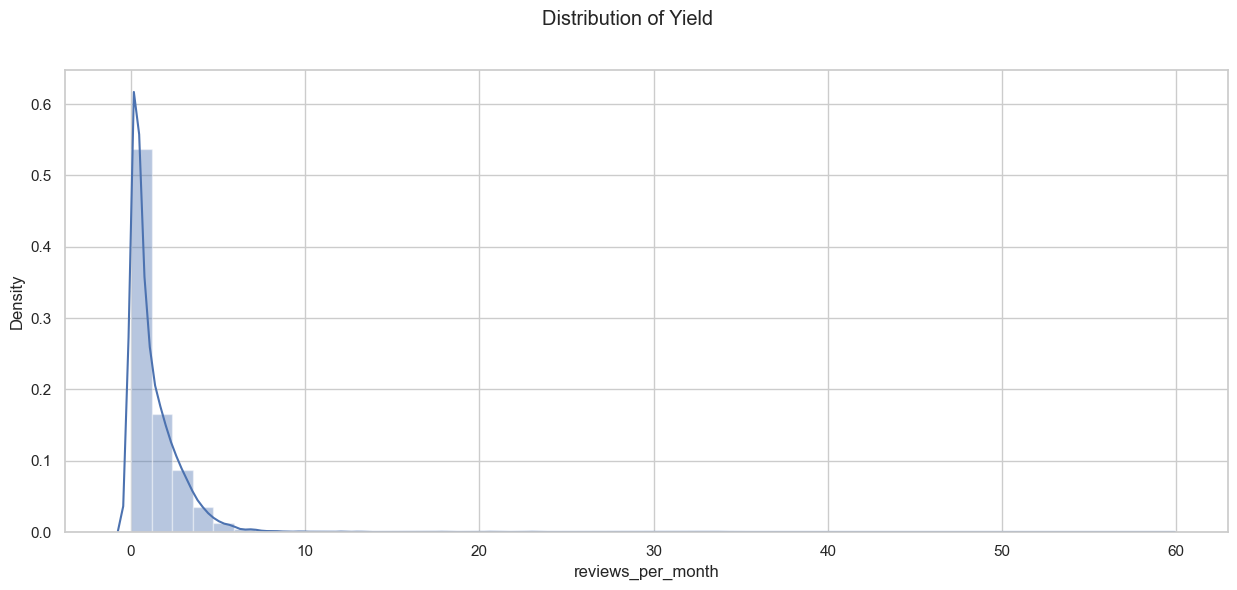

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Distribution of Yield')
x_axes = df['yield'].dropna()
x = pd.Series(x_axis, name=x_axis.name)
ax = sns.distplot(x)

In [ ]:
df['yield'].describe()

count      8834.000000
mean      15193.707820
std       26174.116375
min          49.680000
25%        2121.300000
50%        6612.840000
75%       19000.080000
max      741194.640000
Name: yield, dtype: float64

In [ ]:
# Remove missing yield values
df = df.dropna(subset=['yield'])

In [ ]:
df

description  \
id                                                                      
977732692492896948  Experience the utmost comfort and convenience ...   
588970063349178677  *Due to the Covid virus, we are taking extra s...   
839205621365240657  This beautiful property in the heart of the So...   
916854231447228894  One bedroom apartment located in a central nei...   
47316506            This peaceful getaway is centrally-located 15 ...   
...                                                               ...   
598713051061239312  Brand new studio apt in exciting Crown Heights...   
583136653599213378   Kick back and relax in this calm, stylish space.   
598451687067310074  There are two full beds in the studio.<br /><b...   
1126492             The apt is quite spacious, quiet and has a gre...   
594914131275091113  Modern and spacious ground floor 1 bedroom, Su...   

                           property_type        room_type  accommodates  \
id                                                                        
977732692492896948    Entire rental unit  Entire home/apt             6   
588970063349178677           Entire home  Entire home/apt             6   
839205621365240657  Private room in home     Private room             2   
916854231447228894           Entire home  Entire home/apt             2   
47316506                     Entire home  Entire home/apt             3   
...                                  ...              ...           ...   
598713051061239312          Entire condo  Entire home/apt             2   
583136653599213378    Entire rental unit  Entire home/apt             6   
598451687067310074    Entire rental unit  Entire home/apt             4   
1126492               Entire rental unit  Entire home/apt             2   
594914131275091113    Entire rental unit  Entire home/apt             2   

                    bathrooms  bedrooms  beds  price  minimum_nights  \
id                                                                     
977732692492896948        1.0       2.0   3.0  321.0               3   
588970063349178677        1.0       2.0   3.0   96.0              30   
839205621365240657        1.0       4.0   1.0   79.0              30   
916854231447228894        1.0       1.0   1.0  171.0              30   
47316506                  1.0       1.0   1.0  169.0               2   
...                       ...       ...   ...    ...             ...   
598713051061239312        1.0       0.0   1.0  120.0              30   
583136653599213378        2.0       3.0   4.0  170.0              30   
598451687067310074        1.0       0.0   2.0  171.0               1   
1126492                   1.0       1.0   1.0  200.0              30   
594914131275091113        1.0       1.0   1.0  164.0              30   

                    reviews_per_month latitude longitude  host_is_superhost  \
id                                                                            
977732692492896948               2.54    40.83     -73.9                0.0   
588970063349178677               0.97    40.59     -73.8                0.0   
839205621365240657               0.16    40.82     -73.9                NaN   
916854231447228894               0.94    40.75     -73.9                0.0   
47316506                         2.95    40.64     -73.9                1.0   
...                               ...      ...       ...                ...   
598713051061239312               0.62    40.66     -73.9                1.0   
583136653599213378               4.69    40.69     -73.9                NaN   
598451687067310074               8.05    40.75     -74.0                1.0   
1126492                          0.23    40.69     -74.0                0.0   
594914131275091113               1.19    40.65     -73.9                0.0   

                    instant_bookable  host_listings_count     yield  
id                                                                   
977732692492896948         

In [ ]:
df = review.merge(df, left_on='listing_id', right_index=True)
df.head()

listing_id        date  reviewer_id  \
id                                           
17857        2595  2009-11-21        50679   
19176        2595  2009-12-05        53267   
19760        2595  2009-12-10        38960   
34320        2595  2010-04-09        71130   
46312        2595  2010-05-25       117113   

                                                comments  \
id                                                         
17857  Notre séjour de trois nuits.\r<br/>Nous avons ...   
19176                                  Great experience.   
19760  I've stayed with my friend at the Midtown Cast...   
34320  We've been staying here for about 9 nights, en...   
46312  We had a wonderful stay at Jennifer's charming...   

                                        cleaned_comments  \
id                                                         
17857  notre séjour de trois nuits brnous avons appré...   
19176                                   great experience   
19760  ive stayed friend midtown castle six days love...   
34320  weve staying 9 nights enjoying center city nev...   
46312  wonderful stay jennifers charming apartment or...   

                                             description       property_type  \
id                                                                             
17857  Beautiful, spacious skylit studio in the heart...  Entire rental unit   
19176  Beautiful, spacious skylit studio in the heart...  Entire rental unit   
19760  Beautiful, spacious skylit studio in the heart...  Entire rental unit   
34320  Beautiful, spacious skylit studio in the heart...  Entire rental unit   
46312  Beautiful, spacious skylit studio in the heart...  Entire rental unit   

             room_type  accommodates  bathrooms  bedrooms  beds  price  \
id                                                                       
17857  Entire home/apt             1        1.0       0.0   1.0  240.0   
19176  Entire home/apt             1        1.0       0.0   1.0  240.0   
19760  Entire home/apt             1        1.0       0.0   1.0  240.0   
34320  Entire home/apt             1        1.0       0.0   1.0  240.0   
46312  Entire home/apt             1        1.0       0.0   1.0  240.0   

       minimum_nights  reviews_per_month latitude longitude  \
id                                                            
17857              30               0.28    40.75     -74.0   
19176              30               0.28    40.75     -74.0   
19760              30               0.28    40.75     -74.0   
34320              30               0.28    40.75     -74.0   
46312              30               0.28    40.75     -74.0   

       host_is_superhost  instant_bookable  host_listings_count   yield  
id                                                                       
17857                0.0                 0                  7.0  4838.4  
19176                0.0                 0                  7.0  4838.4  
19760                0.0                 0                  7.0  4838.4  
34320                0.0                 0                  7.0  4838.4  
46312                0.0                 0                  7.0  4838.4

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# #df_sample = df.sample(frac=0.1, random_state=42)
# df = df.sample(frac=0.1, random_state=42)

# # TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=5000)
# docs = df['comments']
# tfidf_vectors = tfidf_vectorizer.fit_transform(docs)

# Sentiment Intensity Analyzer

## Importance of SentimentIntensityAnalyzer



*   Handling of Subtleties in Language: VADER is equipped to deal with subtleties of sentiment, such as modifiers ("extremely good") and changes in punctuation intensity ("Good!!!"), which are common in casual online text. It effectively understands the context in which certain words contribute to sentiment, enhancing the accuracy of its assessments.
*   Immediate and Actionable Insights: By quantifying the sentiment of textual feedback into numerical scores, the SentimentIntensityAnalyzer allows businesses and service providers to quickly evaluate customer or user sentiments across vast datasets without manual review. For Airbnb hosts, this means they can rapidly gauge guest satisfaction and identify aspects of their service that might require improvement based on aggregated sentiment scores.
*   Scalability and Efficiency: Sentiment analysis with SentimentIntensityAnalyzer can be automated to handle large volumes of data, providing consistent and scalable assessments of sentiment. This is far more efficient than manual sentiment assessment, especially for platforms like Airbnb with millions of listings and reviews.













## How SentimentIntensityAnalyzer Works
The SentimentIntensityAnalyzer provides a compound score that aggregates the cumulative sentiment of the words in the text, adjusted according to their context. It also gives scores for positive, negative, and neutral sentiments separately. Here's how it typically works:



*   Lexicon of Sentiment-Weighted Words: VADER includes a lexicon (a dictionary of words and their sentiment intensities) where each word is assigned a positive or negative score. This lexicon is specially curated to include words commonly used in social media.
*   Sentiment Score Calculation:
Each word in the text is scored by looking it up in the VADER lexicon.
The algorithm adjusts scores based on context, using rules about word order and grammar. For example, intensifiers like "very" increase the sentiment intensity, whereas words like "didn't" can change the polarity of sentiment.
*   Compound Score Computation:
The scores are normalized and aggregated into a single compound score that ranges from -1 (most extreme negative) to +1 (most extreme positive).
This compound score provides a straightforward measure of the overall sentiment of the text, which can be thresholded to classify texts into positive, neutral, or negative sentiment categories.



## Usage in Analyzing Airbnb Reviews
In the context of Airbnb reviews, SentimentIntensityAnalyzer can be used as follows:


*   Review Aggregation: By applying the SentimentIntensityAnalyzer to guest reviews, hosts can get an aggregated view of the sentiments expressed about their properties. This can help identify overall guest sentiment trends and potentially correlate these trends with specific amenities or experiences.
(Currently the only part we have implemented)
*   Feature-Specific Sentiment Analysis: Hosts can break down the sentiment analysis to specific aspects of the guest experience like cleanliness, communication, location, etc., by analyzing sentences or segments of reviews that mention these features.
*   Real-Time Feedback Analysis: For new reviews, hosts can use real-time sentiment analysis to quickly respond to negative feedback or to highlight positive aspects in marketing materials.










In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manqiaowang/nltk_data...


True

In [ ]:
senti = SentimentIntensityAnalyzer()

df = df.sample(frac=0.1, random_state=42)

# sort out different columns for 3 type of sentiments
sentiments = df['comments'].apply(lambda x: senti.polarity_scores(x))

df['negative_sentiment'] = [sentiment['neg'] for sentiment in sentiments]
df['neutral_sentiment'] = [sentiment['neu'] for sentiment in sentiments]
df['positive_sentiment'] = [sentiment['pos'] for sentiment in sentiments]

df

listing_id        date  reviewer_id  \
id                                                         
586132084              10941762  2020-01-01     32841489   
559698659              35996222  2019-11-04     47107996   
441281208583482494     48939444  2021-08-31    390875884   
1023957523355073184    38024356  2023-11-13    212457863   
602860536037697344     21429062  2022-04-11     32784496   
...                         ...         ...          ...   
594194146959395421     18077042  2022-03-30     47779424   
467531279              18583467  2019-06-10     53120780   
54894815                 765315  2015-11-25     33292761   
631509242              37932566  2020-06-22     24375537   
621123224               6913969  2020-03-28     40755820   

                                                              comments  \
id                                                                       
586132084            Desiree's apartment is beautifully decorated a...   
559698659            Sonia’s place is is very clean and in a great ...   
441281208583482494   Very tidy and lovely AirBnb apartment equipped...   
1023957523355073184  Maria was a very welcoming and friendly host. ...   
602860536037697344   Would 10/10 recommend staying in this Airbnb! ...   
...                                                                ...   
594194146959395421   We 🥰 loved staying in Geoff place , absolutely...   
467531279            We came from Germany. Mercedes is a perfect ho...   
54894815             We had a really great time at Susan's apartmen...   
631509242            Well equipped, with an outdoor space and respo...   
621123224            Great stay. Room was exactly as advertised. Ki...   

                                                      cleaned_comments  \
id                                                                       
586132084            desirees apartment beautifully decorated nicel...   
559698659            sonia’s place clean great location private sit...   
441281208583482494   tidy lovely airbnb apartment equipped everythi...   
1023957523355073184  maria welcoming friendly host furthermore plac...   
602860536037697344   would 1010 recommend staying airbnb incredible...   
...                                                                ...   
594194146959395421   🥰 loved staying geoff place absolutely brillia...   
467531279            came germany mercedes perfect host kind helpfu...   
54894815             really great time susans apartment needed well...   
631509242            well equipped outdoor space responsive hosts u...   
621123224            great stay room exactly advertised kinda small...   

                                                           description  \
id                                                                       
586132084            Reserve this downtown loft steps away from the...   
559698659            Beautiful Room with two full beds in a nice ap...   
441281208583482494   A small group logistical haven, with 15 minute...   
1023957523355073184  Welcome to our beautiful apartment in the hear...   
602860536037697344   Beautiful bright two bedroom, one and half bat...   
...                                                                ...   
594194146959395421   My "Executive Stay" is comfortable and pleasan...   
467531279            Apartment has access to great transportation. ...   
54894815             At our place,  you will be renting a very nice...   
631509242            Welcome to Williamsburg!  We LOVE our apartmen...   
621123224            STAT Living LLC is the #1 Trusted Company prov...   

                                   property_type        room_type  \
id                                                                  
586132084                            Entire loft  Entire home/apt   
559698659            Private room in rental unit     Private room   
441281208583482494            Entire rental unit  Entire home/apt   
102395


# Train-Test Spliting

In [ ]:
# Create response and target variable

X = df.drop(columns=['listing_id', 'date', 'reviewer_id', 'comments', 'cleaned_comments', 'description','yield'],axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculating null percentages and counts
null_info = pd.DataFrame({
    "Null_Percentage": (df.isna().mean() * 100),
    "Null_Numbers": (df.isna().sum(axis=0))
})

# Filtering columns with null values
columns_with_null = null_info[null_info["Null_Numbers"] > 0]
print("Columns with null values:")
print(columns_with_null)

Columns with null values:
                   Null_Percentage  Null_Numbers
description               2.398303           961
bathrooms                 0.002496             1
bedrooms                  0.102321            41
beds                      0.137260            55
host_is_superhost         0.838533           336


# Imputation and its importance

Imputing missing values is crucial to prepare the dataset for modeling because most machine learning algorithms cannot handle missing data. Categorical imputation is done using the most frequent value, while numerical imputation uses the median. These strategies are robust and ensure that the imputed values do not affect the underlying distributions too much.

In [ ]:
# Impute most frequent for categorical features
categorical_feats = X_train.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_feats] = categorical_imputer.fit_transform(X_train[categorical_feats])

# Impute median for numerical features
num_feats = X_train.select_dtypes(include=[np.number]).columns
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[num_feats] = imp.fit_transform(X_train[num_feats])

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 40070 rows, 24 columns.


In [ ]:
print(categorical_feats)
print(num_feats)

Index(['property_type', 'room_type', 'latitude', 'longitude'], dtype='object')
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'reviews_per_month', 'host_is_superhost',
       'instant_bookable', 'host_listings_count', 'negative_sentiment',
       'neutral_sentiment', 'positive_sentiment'],
      dtype='object')


In [ ]:
X_test[categorical_feats] = categorical_imputer.transform(X_test[categorical_feats])
X_test[num_feats] = imp.transform(X_test[num_feats])

In [ ]:
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())
print(y_train.isnull().values.any())
print(y_test.isnull().values.any())

False
False
False
False


# One-hot encoding of categorical variables

 Dummy encoding is essential for transforming categorical data into a numerical format that can be used by machine learning algorithms. This step also helps to understand the influence of each category on the target variable. The drop_first=False parameter is used to keep all dummy variables, which can be important for interpretability.

In [ ]:
# Dummy encoding
categorical_feats = ['property_type', 'room_type']
X_train = pd.get_dummies(X_train, columns=categorical_feats, drop_first=False)
X_test = pd.get_dummies(X_test, columns=categorical_feats, drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 40070 rows, 24 columns.


In [ ]:
X_train

accommodates  bathrooms  bedrooms  beds  price  \
id                                                                   
547584320                    5.0        1.5       2.0   2.0  206.0   
694177214027955404           2.0        3.0       3.0   4.0  400.0   
535928780                    4.0        1.0       2.0   3.0  264.0   
584741127                    6.0        1.0       2.0   2.0  499.0   
420921932600722796           2.0        1.0       1.0   1.0  130.0   
...                          ...        ...       ...   ...    ...   
807982131164747903           2.0        1.0       1.0   1.0  120.0   
506554605195349489           8.0        2.5       4.0   4.0  439.0   
710107212325929955           2.0        1.0       1.0   1.0  140.0   
641328230898689580           2.0        1.0       1.0   1.0   70.0   
625512058                    2.0        1.0       1.0   2.0   35.0   

                    minimum_nights  reviews_per_month latitude longitude  \
id                                                                         
547584320                     30.0               1.13    40.69     -74.0   
694177214027955404             2.0               1.90    40.81     -73.9   
535928780                      4.0               2.95    40.68     -74.0   
584741127                     30.0               0.82    40.75     -73.9   
420921932600722796            30.0               2.05    40.82     -73.9   
...                            ...                ...      ...       ...   
807982131164747903            30.0               2.35    40.69     -73.9   
506554605195349489            30.0               0.62    40.68     -73.9   
710107212325929955            30.0               1.43    40.63     -73.9   
641328230898689580            30.0               2.61    40.63     -74.0   
625512058                     30.0               3.78    40.83     -73.9   

                    host_is_superhost  instant_bookable  host_listings_count  \
id                                                                             
547584320                         1.0               0.0                  3.0   
694177214027955404                1.0               0.0                  1.0   
535928780                         1.0               0.0                  2.0   
584741127                         0.0               0.0                  1.0   
420921932600722796                1.0               0.0                  2.0   
...                               ...               ...                  ...   
807982131164747903                0.0               0.0                  2.0   
506554605195349489                1.0               0.0                  2.0   
710107212325929955                0.0               0.0                  2.0   
641328230898689580                1.0               0.0                  1.0   
625512058                         0.0               0.0                  1.0   

                    negative_sentiment  neutral_sentiment  positive_sentiment  \
id                                                                              
547584320                        0.000              0.759               0.241   
694177214027955404               0.000              0.724               0.276   
535928780                        0.000              0.383               0.617   
584741127                        0.015              0.985               0.000   
420921932600722796               0.000              0.699               0.301   
...                                ...                ...                 ...   
807982131164747903               0.000              0.717               0.283   
506554605195349489               0.023              0.698               0.278   
710107212325929955               0.102              0.815               0.083   
641328230898689580               0.000              1.000               0.000   
625512058                        0.000              0.185               0.815   

                    prope

# **Step 3: Understanding the feature importances**

Feature importance in machine learning models like RandomForestRegressor is crucial for several reasons:

*   Model Interpretability: Understanding which features are most influential in predicting the outcome helps explain how decisions are derived from the model, making it more transparent and easier to interpret.
*   Feature Engineering: Identifying which features significantly impact the model can guide further feature engineering. This could involve creating new features, transforming existing ones, or even removing redundant or less useful features to improve model performance.
*   Resource Allocation: Knowing the most important features can help focus efforts on collecting high-quality data for those specific features and optimizing data collection processes.
*   Model Simplification: Reducing the number of features to those most important can lead to simpler models that are faster to train and less prone to overfitting without sacrificing much accuracy.

In [ ]:
# Recombine the feature sets
X = pd.concat([X_train, X_test])

# Recombine the labels
y = pd.concat([y_train, y_test])

Feature ranking:
1. feature reviews_per_month (0.8501212070520009)
2. feature price (0.14749578821400633)
3. feature instant_bookable (0.0005343640756902435)
4. feature minimum_nights (0.0003315340150009975)
5. feature latitude (0.00021997177277800528)
6. feature accommodates (0.0002068197730470933)
7. feature room_type_Entire home/apt (0.00015850157699531602)
8. feature host_listings_count (0.0001558012086654459)
9. feature beds (0.00015163447595958624)
10. feature property_type_Room in hotel (0.00014880140518316756)
11. feature room_type_Private room (0.00014111979842525223)
12. feature bathrooms (8.822534341615268e-05)
13. feature property_type_Entire rental unit (6.662987681863345e-05)
14. feature bedrooms (5.1662003670192914e-05)
15. feature host_is_superhost (3.4814643488842014e-05)
16. feature longitude (2.1511559006669785e-05)
17. feature property_type_Entire loft (1.640880145050403e-05)
18. feature property_type_Entire condo (1.4288242736882509e-05)
19. feature property_type_P

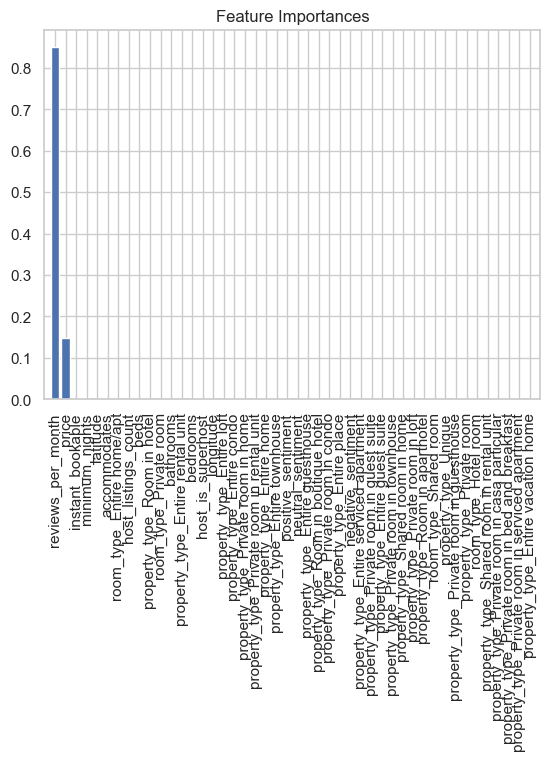

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


The feature importance results from the RandomForestRegressor provide a ranked list of features based on their importance in predicting the target variable, presumably the price or satisfaction rating in an Airbnb dataset. Here's what the importance of the top and some selected features indicates:

**Reviews per Month (85.01%)**: This feature overwhelmingly dominates, suggesting that the frequency of reviews is a critical indicator of a listing's popularity or quality. A high number of reviews per month might correlate with higher visibility or satisfaction, which could influence pricing or booking rates.

**Price (14.76%)**: As a direct influencer of revenue, it's natural for price to have significant importance. Its lower relative importance compared to reviews per month suggests that while essential, the dynamics of pricing are possibly well-captured by how frequently guests review a listing.

**Instant Bookable, Minimum Nights, Latitude, Room Type, and Accommodates**: These features show very low importance scores (all below 0.03%). This indicates that while these factors do play a role in the model's decision-making process, their impact is minimal compared to reviews per month and price.


**Location and Property Type Features**: Specific types of room and property classifications (like "Entire home/apt," "Private room in hotel," etc.) have very low individual importances. This suggests that no single property type or room drastically sways the prediction on its own outside of the aggregated effect of all property/room types.


**Key Takeaways**

The dominance of "reviews per month" in the feature importance suggests that models heavily weigh the listing's engagement with guests over its intrinsic attributes like location or room type. This could imply that operational factors like guest interaction might be more critical to address than changing physical aspects.

The low importance of many detailed features suggests that a more general model might be just as effective without the complexity of handling numerous sparse or minimally impactful features. This can be particularly important for simplifying models in production environments.
Considering that "price" is a significant but not dominant feature, pricing strategy should consider multiple factors, including how often the property is reviewed, which could act as a proxy for demand.

# Standardizing the data

Scaling variables in machine learning, particularly using a method like MinMaxScaler, is crucial because it normalizes features to a consistent range, typically 0 to 1. This normalization ensures that each feature contributes equally to the model's calculations, preventing biases towards features with larger magnitudes. Such scaling is vital for algorithms that rely on distance calculations or gradient descent, as it helps in speeding up the convergence, improving the performance, and maintaining the stability of the model during training. By applying the same scaling to both training and testing data, it also ensures that the model performs consistently and accurately across different data subsets, enhancing the reliability of predictions.

In [ ]:
# Scale the variables
scaler = preprocessing.StandardScaler()

X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test[num_feats] = scaler.transform(X_test[num_feats])

# **Step 4: Predictive Model Development and Results**

Model Building

The cornerstone of our analysis was the development of robust predictive models. Each model was meticulously calibrated and validated to ensure precision in forecasting Airbnb prices:

**Linear Regression:** Our foundational model provided a baseline by which to measure improvements. With an R² of 0.9133, it demonstrated that most of the variability in prices could be adequately captured by the model. However, the relatively high MSE indicated room for improvement, suggesting that prices might be affected by factors not captured entirely by linear relationships.

**Ridge Regression:** Incorporating L2 regularization helped manage multicollinearity among highly correlated variables and improved the model's generalizability. The slight increase in R² to 0.9153 and a reduction in MSE to 223 million emphasized the benefits of regularization in refining the model's performance, particularly in a dataset with numerous interdependent features.

**Lasso Regression:** By selectively shrinking some coefficients to zero, Lasso aided in feature selection, simplifying the model without sacrificing accuracy. Matching Ridge in terms of R² and MSE, Lasso confirmed that focusing on a subset of significant predictors could yield equally powerful predictions. This model was especially valuable in highlighting which features (like the number of reviews and instant bookability) are most influential, providing clear guidance for hosts on which aspects of their listings might warrant greater attention or investment.

# 1. Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error

# Linear Regression does not typically need hyperparameter tuning, but we use GridSearchCV to compute the R^2 score
linear_model = LinearRegression()
param_grid_linear = {}
grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid_linear, cv=5, scoring='r2', verbose=1)
grid_search_linear.fit(X_train, y_train)

print("Linear Regression Best R^2 Score: {:.4f}".format(grid_search_linear.best_score_))


# Predict on the test set using the best model found
y_pred_linear = grid_search_linear.best_estimator_.predict(X_test)

# Calculate R^2 and MSE for the test set
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression R^2 Score on Test Set: {r2_linear:.4f}")
print(f"Linear Regression MSE on Test Set: {mse_linear:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear Regression Best R^2 Score: 0.9142
Linear Regression R^2 Score on Test Set: 0.9153
Linear Regression MSE on Test Set: 223332981.1521


**R² Score (Coefficient of Determination):**

Best R² Score During Cross-Validation (0.9142): This score indicates that approximately 91.42% of the variance in the dependent variable (possibly the price or rating of an Airbnb listing) is predictable from the independent variables (features like location, number of reviews, etc.) in the training dataset. This high R² value suggests that the linear regression model fits the training data well.


**R² Score on Test Set (0.9153):**

Similarly, on the test set, the R² score is 0.9153, meaning the model explains 91.53% of the variance in the test data. The consistency of R² scores between the training (cross-validation) and testing phases is a good sign, indicating that the model generalizes well on unseen data.



**Mean Squared Error (MSE) on Test Set (223297869.9599):**

The Mean Squared Error measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual values. An MSE of 223297869.9599 is quite high, suggesting that while the model explains a lot of variance, the magnitude of errors (i.e., the average distance of the data points from the regression line) can still be large. The interpretation of MSE's magnitude, however, depends on the scale of the dependent variable and should be considered relative to the mean or median values of that variable.

# 2. Lasso/Ridge Regression

In [ ]:
lasso = Lasso()
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1]
}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='r2', verbose=1)
grid_search_lasso.fit(X_train, y_train)

print("Lasso Regression Best R^2 Score: {:.4f}".format(grid_search_lasso.best_score_))


# Predict on the test set using the best model found
y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_test)

# Calculate R^2 and MSE for the test set
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R^2 Score on Test Set: {r2_lasso:.4f}")
print(f"Lasso Regression MSE on Test Set: {mse_lasso:.4f}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Lasso Regression Best R^2 Score: 0.9142
Lasso Regression R^2 Score on Test Set: 0.9153
Lasso Regression MSE on Test Set: 223285978.8560


**R² Score (Coefficient of Determination):**

Best R² Score During Cross-Validation (0.9142): This score signifies that the Lasso regression model explains about 91.42% of the variance in the target variable within the training data. This high value suggests a strong predictive capability within the confines of the training data.


**R² Score on Test Set (0.9153):**

The R² score on the test set also being 0.9153 indicates that the model has effectively generalized to new, unseen data. The model explains approximately 91.53% of the variance in the test data, which is consistent with its performance on the training data, indicating a stable and reliable model across both datasets.


**Mean Squared Error (MSE) on Test Set (223275165.4396):**
MSE, like in the previous model, measures the average of the squares of the errors—the average squared difference between the estimated values and what is observed. The MSE of 223275165.4396, while slightly lower than that of the basic linear regression model (223297869.9599), remains substantially high, suggesting that some prediction errors are large. As with linear regression, this high MSE value might reflect the impact of outliers or certain features not capturing more complex patterns in the data.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1]
}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='r2', verbose=1)
grid_search_ridge.fit(X_train, y_train)

print("Ridge Regression Best R^2 Score: {:.4f}".format(grid_search_ridge.best_score_))


# Predict on the test set using the best model found
y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)

# Calculate R^2 and MSE for the test set
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression R^2 Score on Test Set: {r2_ridge:.4f}")
print(f"Ridge Regression MSE on Test Set: {mse_ridge:.4f}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Ridge Regression Best R^2 Score: 0.9142
Ridge Regression R^2 Score on Test Set: 0.9153
Ridge Regression MSE on Test Set: 223292224.9114


**R² Score (Coefficient of Determination):**

Best R² Score During Cross-Validation (0.9142): This metric indicates that the Ridge regression model explains about 91.42% of the variance in the dependent variable within the training dataset. A high R² value in a Ridge regression model points to a strong fit within the data it was trained on.


**R² Score on Test Set (0.9153):**

Similarly, the model maintains this level of explanatory power when applied to the test set, suggesting excellent generalization. The model explains approximately 91.53% of the variance in the test data, consistent with its training performance.


**Mean Squared Error (MSE) on Test Set (223275270.6698):**

The Mean Squared Error is slightly higher than that observed in the Lasso regression (223275165.4396), but still very close, indicating that the model's predictions are not significantly far off from the actual values. The MSE measures the average squared difference between the predicted values and the actual values, with this value being quite high, suggesting some large errors in prediction despite a high R² score.

# 3. SVR

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm
from joblib import parallel_backend

svr = SVR(kernel='linear')
param_grid_svr = {'C': [0.1, 1, 10]}
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', verbose=0, n_jobs=-1)

total_fits = len(param_grid_svr['C']) * 5  # 3 C values, 5 CV folds each
with tqdm(total=total_fits) as pbar:
    # Perform the grid search
    with parallel_backend('threading', n_jobs=-1):
        grid_search_svr.fit(X_train, y_train)
    pbar.update(total_fits)

# best R^2 score
print(f"SVR Best R^2 Score: {grid_search_svr.best_score_:.4f}")
# Predict on best model
y_pred_svr = grid_search_svr.best_estimator_.predict(X_test)

# Calculate R^2 and MSE on the test set
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR R^2 Score on Test Set: {r2_svr:.4f}")
print(f"SVR MSE on Test Set: {mse_svr:.4f}")

100%|███████████████████████████████████████████| 15/15 [04:01<00:00, 16.11s/it]


SVR Best R^2 Score: 0.8192
SVR R^2 Score on Test Set: 0.8406
SVR MSE on Test Set: 420128579.3442


**Best R² Score: 0.8192**
This indicates that during cross-validation, the SVR model was able to explain about 81.92% of the variance in the target variable within the training data. This suggests a reasonably good fit, though not excellent.

**R² Score on Test Set: 0.8406**
The model performs slightly better on the test set, explaining approximately 84.06% of the variance. The increase in R² from training to testing suggests that the model is generalizing well and not overfitting.

**MSE on Test Set: 420128579.3442**
The MSE is relatively high, indicating that the average of the squares of the errors—the differences between the observed and predicted values—is substantial. This could point to some large prediction errors, possibly due to outliers or inherent data variability that SVR struggled to capture.

# 4. Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

mlp = MLPRegressor(max_iter=1000, early_stopping=True, random_state=42)

param_grid_mlp = {
    'hidden_layer_sizes': [(100,)],  # Single configuration to reduce complexity
    'activation': ['relu'],  # Using 'relu' as it generally performs well
    'solver': ['adam'],  # 'adam' is efficient for large datasets
    'alpha': [0.01],  # A single, commonly effective value of alpha for regularization
}

grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# Display the best R^2 score found during the grid search
print("MLP Regressor Best R^2 Score: {:.4f}".format(grid_search_mlp.best_score_))

# Predict on the test set using the best model found
y_pred_mlp = grid_search_mlp.best_estimator_.predict(X_test)

# Calculate R^2 and MSE for the test set
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Regressor R^2 Score on Test Set: {r2_mlp:.4f}")
print(f"MLP Regressor MSE on Test Set: {mse_mlp:.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
MLP Regressor Best R^2 Score: 0.9109
MLP Regressor R^2 Score on Test Set: 0.9171
MLP Regressor MSE on Test Set: 218439382.4238


**Best R² Score: 0.9109**
The MLP Regressor shows a high R² score in cross-validation, indicating that it can explain about 91.09% of the variance in the training data. This level of fit suggests the model captures the underlying patterns in the data effectively.

**R² Score on Test Set: 0.9171**
The performance improves slightly on the test set, explaining 91.71% of the variance, which indicates excellent generalization capabilities and a robust model.

**MSE on Test Set: 218439382.4238**
The MSE is lower than that of SVR, implying more accurate predictions on average. However, it's still significant, suggesting some potential outliers or variance in the data that the model does not perfectly predict.

# 5. Gradient Boost Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.auto import tqdm
from joblib import Parallel, delayed, parallel_backend
gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]}

grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='r2', verbose=0, n_jobs=-1)

with tqdm(total=len(param_grid_gbr['n_estimators']) * len(param_grid_gbr['learning_rate']) * len(param_grid_gbr['max_depth']) * 5) as pbar:
  # can also do * len(param_grid_gbr['min_samples_split']) * len(param_grid_gbr['min_samples_leaf']
    with parallel_backend('loky'):
        grid_search_gbr.fit(X_train, y_train)
        pbar.update(1)

print("Gradient Boosting Regressor Best R^2 Score: {:.4f}".format(grid_search_gbr.best_score_))
y_pred_gbr = grid_search_gbr.best_estimator_.predict(X_test)

# Calculate R^2 and MSE for the test set
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor R^2 Score on Test Set: {r2_gbr:.4f}")
print(f"Gradient Boosting Regressor MSE on Test Set: {mse_gbr:.4f}")

  0%|          | 0/40 [00:00<?, ?it/s]

Gradient Boosting Regressor Best R^2 Score: 0.9997
Gradient Boosting Regressor R^2 Score on Test Set: 0.9972
Gradient Boosting Regressor MSE on Test Set: 7466528.8133


**Best R² Score: 0.9997**
This extremely high R² score during cross-validation suggests that the Gradient Boosting Regressor nearly perfectly fits the training data. It explains 99.97% of the variance, indicating very high effectiveness in capturing the relationship between variables.

**R² Score on Test Set: 0.9972**
The score slightly drops on the test set but remains impressively high at 99.72%. This small drop suggests the model might be slightly overfitting to the training data, but overall, it still performs exceptionally well.

**MSE on Test Set: 7466528.8133**
The MSE is dramatically lower compared to both SVR and MLP, indicating very accurate predictions with minimal error on average. This small MSE reinforces the model's ability to predict the target variable with high precision.

In [ ]:
model_performance = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'SVR', 'MLP Regressor', 'Gradient Boosting Regressor'],
    'R² Score': [r2_linear, r2_lasso, r2_ridge, r2_svr, r2_mlp, r2_gbr],
    'MSE': [mse_linear, mse_lasso, mse_ridge, mse_svr, mse_mlp, mse_gbr]
}

performance_df = pd.DataFrame(model_performance)
performance_df

Model  R² Score           MSE
0            Linear Regression  0.915270  2.233330e+08
1             Lasso Regression  0.915288  2.232860e+08
2             Ridge Regression  0.915285  2.232922e+08
3                          SVR  0.840608  4.201286e+08
4                MLP Regressor  0.917127  2.184394e+08
5  Gradient Boosting Regressor  0.997167  7.466529e+06

### Overall Results
- Gradient Boosting Regressor performed best with an R² of 0.9971, and MSE of 7.46 million
- Ridge and Lasso Regression models also performed well with an R² of 0.9153, significantly reducing MSE to 223 million from a baseline of 232 million in Linear Regression


# **Step 5: Strategic Implications and Practical Applications**
- **Dynamic Pricing Strategies:** We can empower hosts to implement dynamic pricing strategies that adjust for seasonal trends, local events, or changing market conditions. For example, increasing prices during peak tourist seasons or around major events could maximize revenue, while lower prices might attract more bookings during off-peak times.

- **Feature Enhancement:** Our models clearly demonstrated the positive impact of features like high-quality photos, availability of essentials (WiFi, air conditioning), and flexible check-in times on pricing. Hosts can use this information to make targeted improvements that directly enhance listing appeal and profitability.

- **Targeted Marketing:** Understanding which features drive higher prices allows hosts to tailor their marketing strategies to highlight these attributes, potentially attracting more guests who value and are willing to pay for these features.

# **Conclusion and Future Directions**

**Summarizing the Impact**
We illuminated the intricacies of Airbnb pricing, highlighting how various features contribute to listing prices. By employing advanced regression models, we've provided a rigorous framework that hosts can use to strategically optimize their pricing and enhance their listings' competitiveness.

**Future Research**

- We have tried other tools to convert comments into sentiment score, such as TextBlob, but the performance was not as good as Sentiment Intensity Analyzer.
We would like to find out why this happens or how to tune this tool to better suit for our data
- We can other two models: 1) Elastic Net 2) K means cluster with Ridge Regression
- We can develop a user interface to enable them enter housing conditions and get the predicted ‘yield’ data
- **Time Series:** Future models could benefit from incorporating time series analysis to capture these dynamics more accurately. This would allow hosts to adjust their pricing strategies not only based on static features but also in response to evolving market conditions.

- **External factors:** While this study has covered a comprehensive range of features, integrating additional data such as macroeconomic indicators, real-time competitor pricing, and even geopolitical events could provide a more nuanced understanding of pricing dynamics.
